# Reboot Student QoL
In this notebook we will analize data about the quality of life of the students in reboot. 
Based on a dataset containing diferent ratings for Psychological, Physiological, Environmental, Academic and Social factors.

## Taking a general look at the data.

Comparison of Actual Max Values vs Expected Max Values:
Column                         Actual Max      Expected Max    Match?    
----------------------------------------------------------------------
anxiety_level                  21              20              ✗         
self_esteem                    30              30              ✓         
depression                     27              20              ✗         
mental_health_history          1               1               ✓         
headache                       5               5               ✓         
blood_pressure                 3               3               ✓         
sleep_quality                  5               5               ✓         
breathing_problem              5               5               ✓         
noise_level                    5               5               ✓         
living_conditions              5               5               ✓         
safety                         5               5           

<Figure size 1400x1000 with 0 Axes>

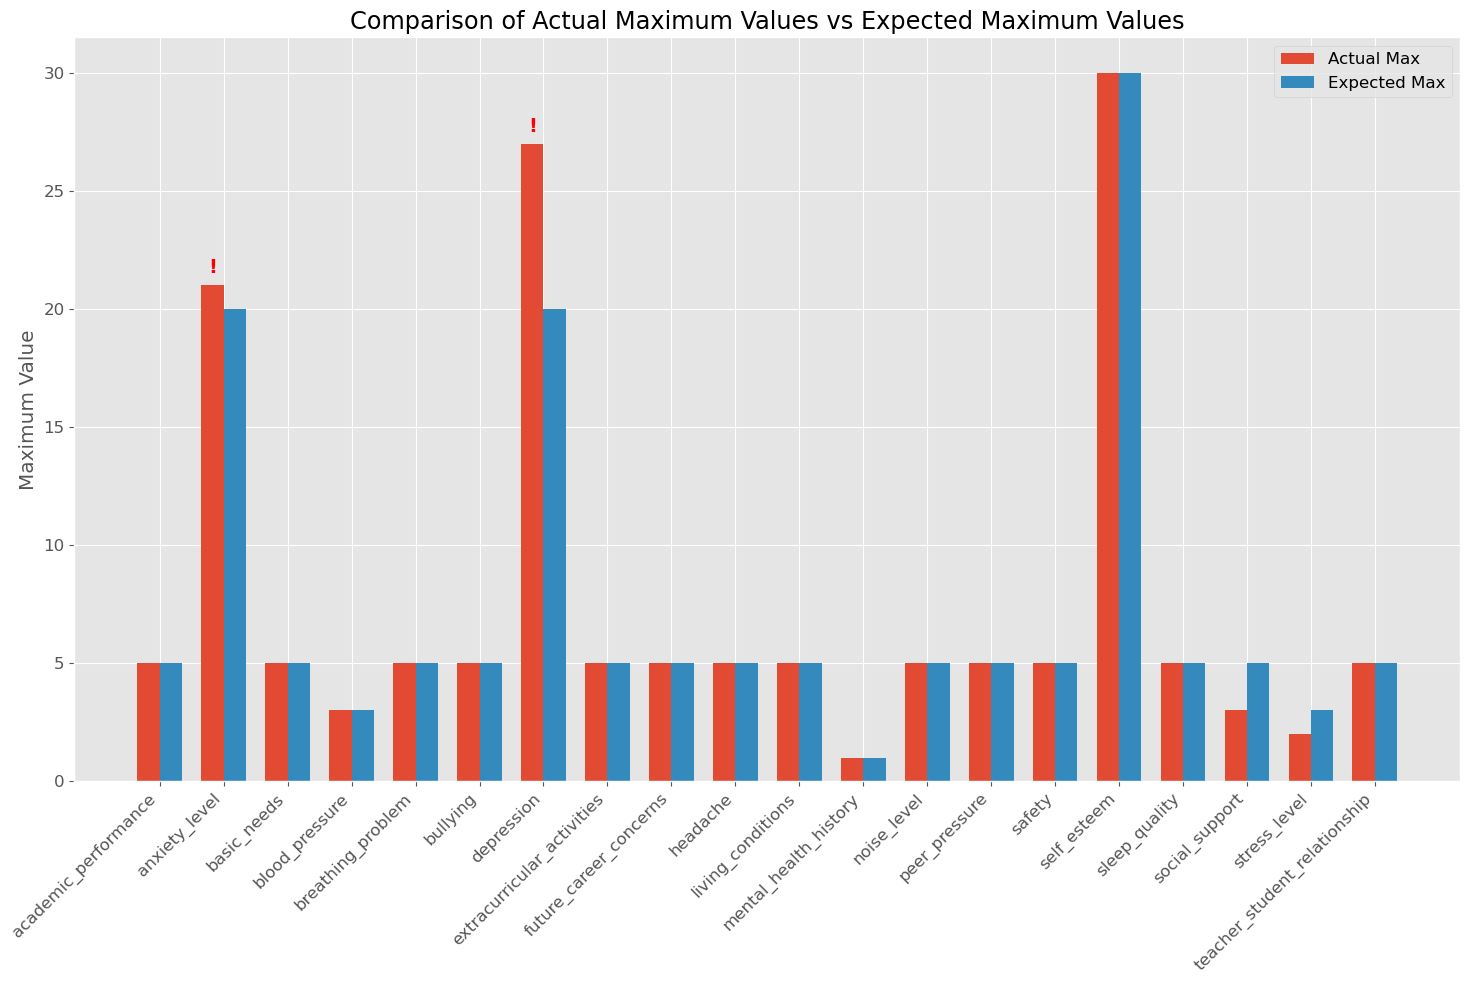


Columns with values exceeding expected maximums:


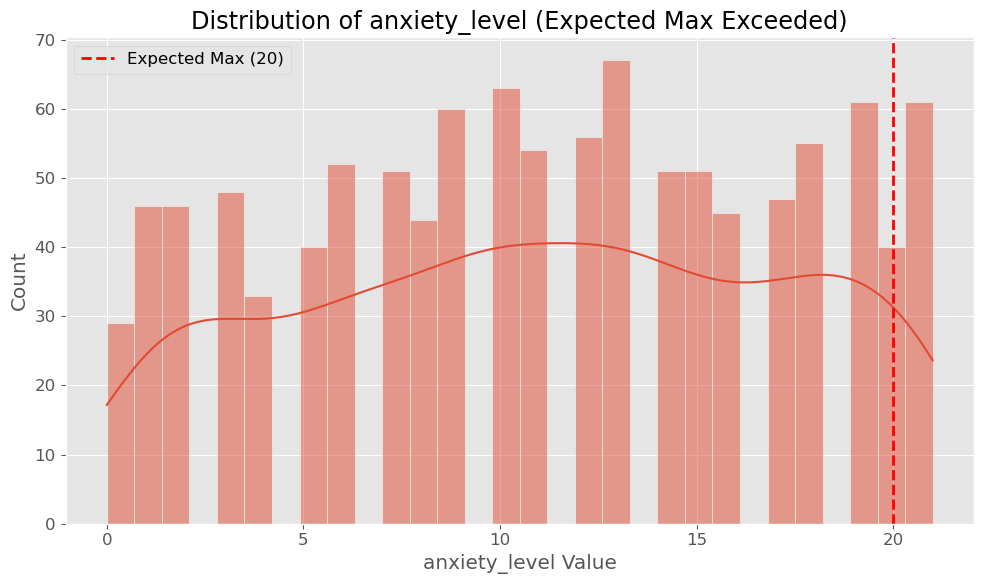

  - anxiety_level: Expected max is 20, but 61 records (5.5%) exceed this value


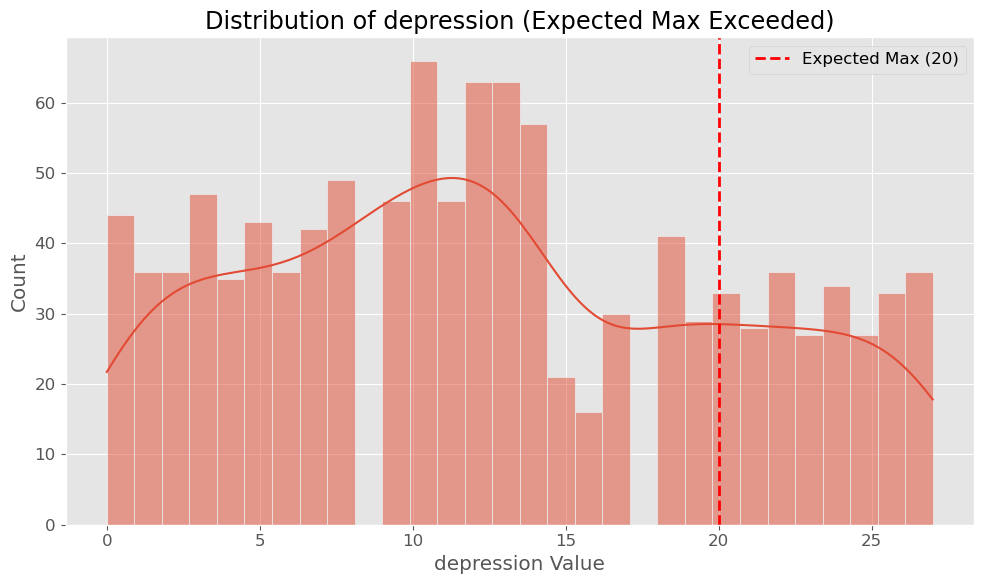

  - depression: Expected max is 20, but 221 records (20.1%) exceed this value


In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import MatplotlibDeprecationWarning

# Suppress the specific FutureWarning from seaborn
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

# Load the dataset
df = pd.read_csv('ReBoot_Student_Stress_Factors.csv')

# Get the maximum values from the dataset
max_values = df.max()

# Define expected maximum values based on data_guide.txt
expected_ranges = {
    'anxiety_level': 20,
    'self_esteem': 30,
    'depression': 20,  # Note: data_guide says 1-20 but our data has max 27
    'mental_health_history': 1,
    'headache': 5,
    'blood_pressure': 3,
    'sleep_quality': 5,
    'breathing_problem': 5,
    'noise_level': 5,
    'living_conditions': 5,
    'safety': 5,
    'basic_needs': 5,
    'academic_performance': 5,
    'study_load': None,  # Integer (no specific max in guide)
    'teacher_student_relationship': 5,
    'future_career_concerns': 5,
    'social_support': 5,
    'peer_pressure': 5,
    'extracurricular_activities': 5,
    'bullying': 5,
    'stress_level': 3  # Guide mentions 1-3 range
}

# Compare actual maximums with expected maximums
print("Comparison of Actual Max Values vs Expected Max Values:")
print(f"{'Column':<30} {'Actual Max':<15} {'Expected Max':<15} {'Match?':<10}")
print("-" * 70)

for col, expected_max in expected_ranges.items():
    if expected_max is not None:
        actual_max = max_values[col]
        # Check if the actual max is within the expected range
        if col == 'stress_level' and actual_max <= 2:  # Special case for stress_level (0-indexed)
            match = "✓" 
        elif actual_max <= expected_max:
            match = "✓"
        else:
            match = "✗"
        
        print(f"{col:<30} {actual_max:<15} {expected_max:<15} {match:<10}")
    else:
        print(f"{col:<30} {max_values[col]:<15} {'Not specified':<15} {'N/A':<10}")

# Visualize the comparison
plt.figure(figsize=(14, 10))
columns = []
actual_maxes = []
expected_maxes = []

for col, expected_max in expected_ranges.items():
    if expected_max is not None:
        columns.append(col)
        actual_maxes.append(max_values[col])
        expected_maxes.append(expected_max)

# Sort by column name
sorted_indices = sorted(range(len(columns)), key=lambda i: columns[i])
sorted_columns = [columns[i] for i in sorted_indices]
sorted_actual = [actual_maxes[i] for i in sorted_indices]
sorted_expected = [expected_maxes[i] for i in sorted_indices]

x = np.arange(len(sorted_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, sorted_actual, width, label='Actual Max')
rects2 = ax.bar(x + width/2, sorted_expected, width, label='Expected Max')

ax.set_ylabel('Maximum Value')
ax.set_title('Comparison of Actual Maximum Values vs Expected Maximum Values')
ax.set_xticks(x)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
ax.set_xticklabels(sorted_columns, rotation=45, ha='right')
ax.legend()

# Highlight discrepancies
for i, (actual, expected) in enumerate(zip(sorted_actual, sorted_expected)):
    if actual > expected:
        plt.text(i - width/2, actual + 0.5, '!', color='red', ha='center', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

# Additional analysis for discrepancies
discrepancies = []
for col, expected_max in expected_ranges.items():
    if expected_max is not None and max_values[col] > expected_max:
        discrepancies.append(col)

if discrepancies:
    print("\nColumns with values exceeding expected maximums:")
    for col in discrepancies:
        # Show the distribution of the problematic column
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.axvline(expected_ranges[col], color='red', linestyle='dashed', 
                   linewidth=2, label=f'Expected Max ({expected_ranges[col]})')
        plt.title(f'Distribution of {col} (Expected Max Exceeded)')
        plt.xlabel(f'{col} Value')
        plt.ylabel('Count')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Show how many records exceed the expected maximum
        exceed_count = df[df[col] > expected_ranges[col]].shape[0]
        exceed_percent = (exceed_count / len(df)) * 100
        print(f"  - {col}: Expected max is {expected_ranges[col]}, but {exceed_count} records ({exceed_percent:.1f}%) exceed this value")

## Summary of data quality. 

The data looks mostly correct, we have 1100 students in the data set, no missing values , there is a discrepancy about the max depression score (should be max 20), and the 
There is one column with redundant data : stress_level & str_level (we will get rid of one of them)
No further data cleaning needed. 

In [4]:
# Define expected maximum values based on data_guide.txt
expected_ranges = {
    'anxiety_level': 20,
    'self_esteem': 30,
    'depression': 20,  # Based on data_guide
    'mental_health_history': 1,
    'headache': 5,
    'blood_pressure': 3,
    'sleep_quality': 5,
    'breathing_problem': 5,
    'noise_level': 5,
    'living_conditions': 5,
    'safety': 5,
    'basic_needs': 5,
    'academic_performance': 5,
    'study_load': 5,  # Based on the guide's scale (may need adjustment)
    'teacher_student_relationship': 5,
    'future_career_concerns': 5,
    'social_support': 5,
    'peer_pressure': 5,
    'extracurricular_activities': 5,
    'bullying': 5,
    'stress_level': 2  # Based on 0-indexed values in the data (0,1,2 instead of 1,2,3)
}

# Check for values exceeding max limits
print("Checking for values exceeding expected maximum limits...")
exceeding_columns = []

for col, max_val in expected_ranges.items():
    # Count values exceeding expected maximum
    exceeding_count = df[df[col] > max_val].shape[0]
    
    if exceeding_count > 0:
        exceeding_columns.append(col)
        exceeding_percent = (exceeding_count / len(df)) * 100
        print(f"{col}: {exceeding_count} values ({exceeding_percent:.1f}%) exceed max of {max_val}")

# Fix the dataset by capping values to their expected maximum
if exceeding_columns:
    print("\nFixing dataset by capping values to their expected maximum...")
    
    # Create a backup of the original dataset
    df_original = df.copy()
    
    # Apply caps to each column that needs fixing
    for col in exceeding_columns:
        max_val = expected_ranges[col]
        df[col] = df[col].clip(upper=max_val)
        print(f"Updated {col}: capped values to maximum of {max_val}")
    
    # Verify the changes
    print("\nVerification after fixes:")
    for col in exceeding_columns:
        max_after = df[col].max()
        print(f"{col} - New maximum value: {max_after}")
        
    # Calculate how many records were modified
    modified_count = sum((df_original[col] != df[col]).sum() for col in exceeding_columns)
    print(f"\nTotal modifications: {modified_count} values across {len(exceeding_columns)} columns")
else:
    print("All values are within expected ranges. No modifications needed.")

# Remove the redundant str_level column if it exists
if 'str_level' in df.columns:
    df = df.drop(columns=['str_level'])
    print("\nRemoved redundant 'str_level' column")

# Verify the updated dataset
print(f"\nUpdated dataset shape: {df.shape}")
print(f"Updated columns: {df.columns.tolist()}")

# Verify all maximum values are now within expected ranges
print("\nVerifying all maximum values are now within expected ranges:")
all_within_range = True
for col, max_val in expected_ranges.items():
    current_max = df[col].max()
    if current_max <= max_val:
        status = "✓"
    else:
        status = "✗"
        all_within_range = False
    print(f"{col}: max = {current_max} (expected ≤ {max_val}) {status}")

if all_within_range:
    print("\nAll values are now within expected ranges!")
else:
    print("\nThere are still some values exceeding expected ranges. Additional review required.")

Checking for values exceeding expected maximum limits...
anxiety_level: 61 values (5.5%) exceed max of 20
depression: 221 values (20.1%) exceed max of 20

Fixing dataset by capping values to their expected maximum...
Updated anxiety_level: capped values to maximum of 20
Updated depression: capped values to maximum of 20

Verification after fixes:
anxiety_level - New maximum value: 20
depression - New maximum value: 20

Total modifications: 282 values across 2 columns

Removed redundant 'str_level' column

Updated dataset shape: (1100, 21)
Updated columns: ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

Verifying all maximum values are now within exp

# Basic analisis 
## Average anxiety levels & how many student report mental issues. 

Anxiety Analysis:
Average anxiety level: 11.01 out of 20 (max score)
Distribution of anxiety levels:


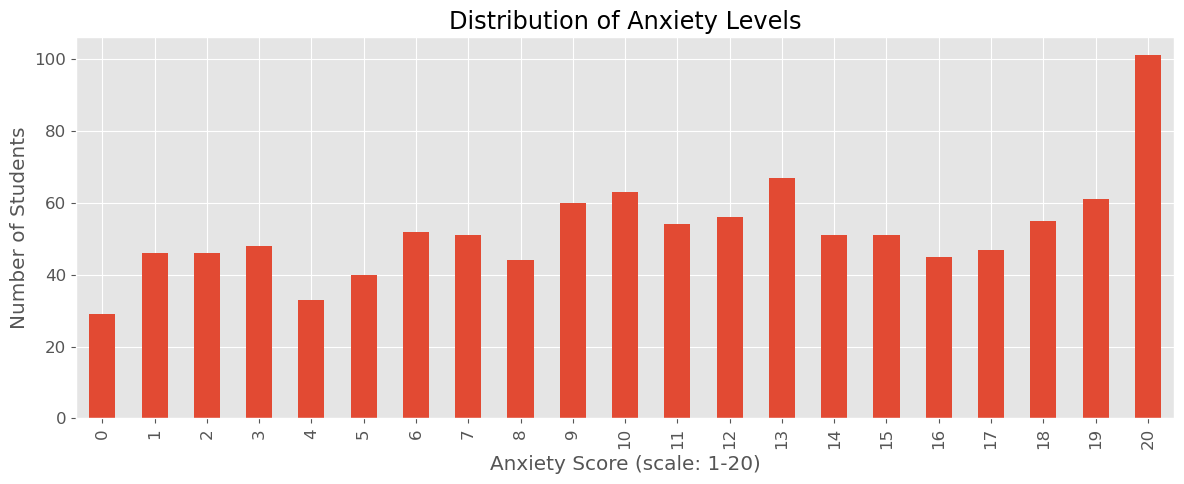


Mental Health Analysis:
Students reporting mental health history: 542 (49.3%)

Depression Analysis:
Average depression score: 11.74 out of 20 (max score)
Students with high depression scores (>15): 370 (33.6%)


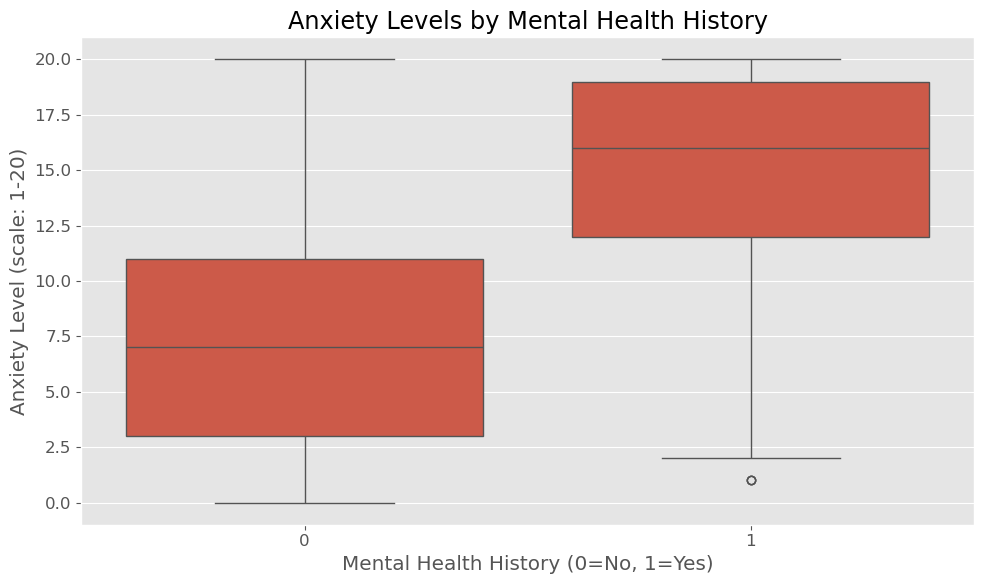

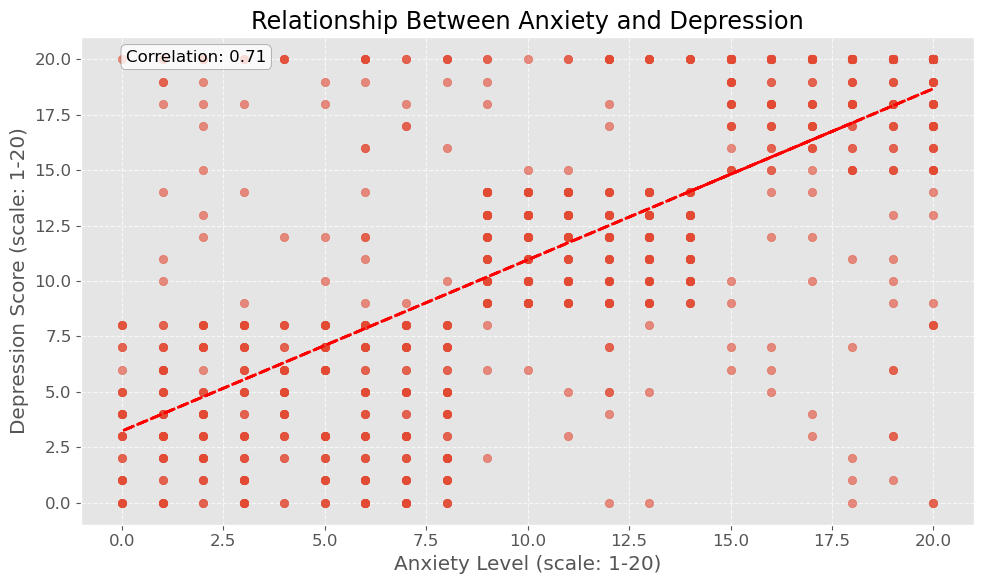

In [6]:
# Calculate average anxiety level
avg_anxiety = df['anxiety_level'].mean()

# Count students with mental health history (where value is 1)
mental_health_issues = df['mental_health_history'].sum()
percentage_mental_health = (mental_health_issues / len(df)) * 100

# Calculate depression stats
avg_depression = df['depression'].mean()
high_depression = df[df['depression'] > 15].shape[0]  # Considering scores >15 as high depression (75% of max 20)
percentage_high_depression = (high_depression / len(df)) * 100

# Display results
print(f"Anxiety Analysis:")
print(f"Average anxiety level: {avg_anxiety:.2f} out of 20 (max score)")
print(f"Distribution of anxiety levels:")
# Create the plot correctly
plt.figure(figsize=(12, 5))
df['anxiety_level'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Anxiety Levels')
plt.xlabel('Anxiety Score (scale: 1-20)')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()  

print(f"\nMental Health Analysis:")
print(f"Students reporting mental health history: {mental_health_issues} ({percentage_mental_health:.1f}%)")

print(f"\nDepression Analysis:")
print(f"Average depression score: {avg_depression:.2f} out of 20 (max score)")
print(f"Students with high depression scores (>15): {high_depression} ({percentage_high_depression:.1f}%)")

# Visualize mental health history vs anxiety levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='mental_health_history', y='anxiety_level', data=df)
plt.title('Anxiety Levels by Mental Health History')
plt.xlabel('Mental Health History (0=No, 1=Yes)')
plt.ylabel('Anxiety Level (scale: 1-20)')
plt.tight_layout()
plt.show()

# Add a comparison between anxiety and depression
plt.figure(figsize=(10, 6))
plt.scatter(df['anxiety_level'], df['depression'], alpha=0.6)
plt.title('Relationship Between Anxiety and Depression')
plt.xlabel('Anxiety Level (scale: 1-20)')
plt.ylabel('Depression Score (scale: 1-20)')
plt.grid(True, linestyle='--', alpha=0.7)

# Add correlation coefficient
correlation = df['anxiety_level'].corr(df['depression'])
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Add regression line
x = df['anxiety_level']
y = df['depression']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--', linewidth=2)

plt.tight_layout()
plt.show()

We can't see any specific correlation in the anxiety score they seem to be randomly distributed. 
We can observe that there is a strong correlation with anxiety level in students with mental health history.

## Psychological factors. 
Investigate 
    How many students have self_esteem below the average?
    What percentage experience depression beyond a clinical threshold?


Self-Esteem Analysis:
Average self-esteem score: 17.78 (scale: 1-30)
Students with below-average self-esteem: 507 (46.1%)

Depression Analysis:
Students with depression at or above clinical threshold (≥16): 370 (33.6%)


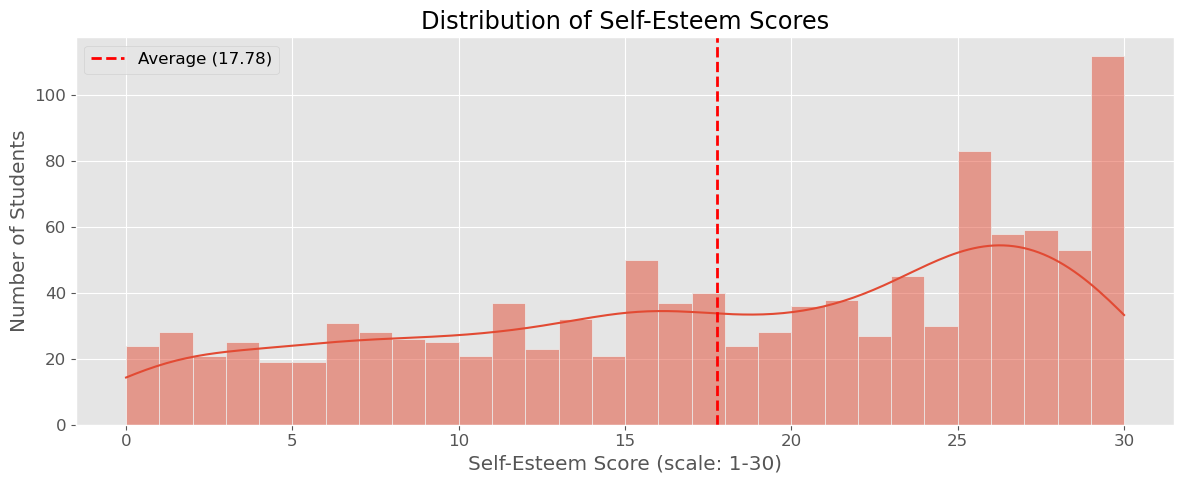

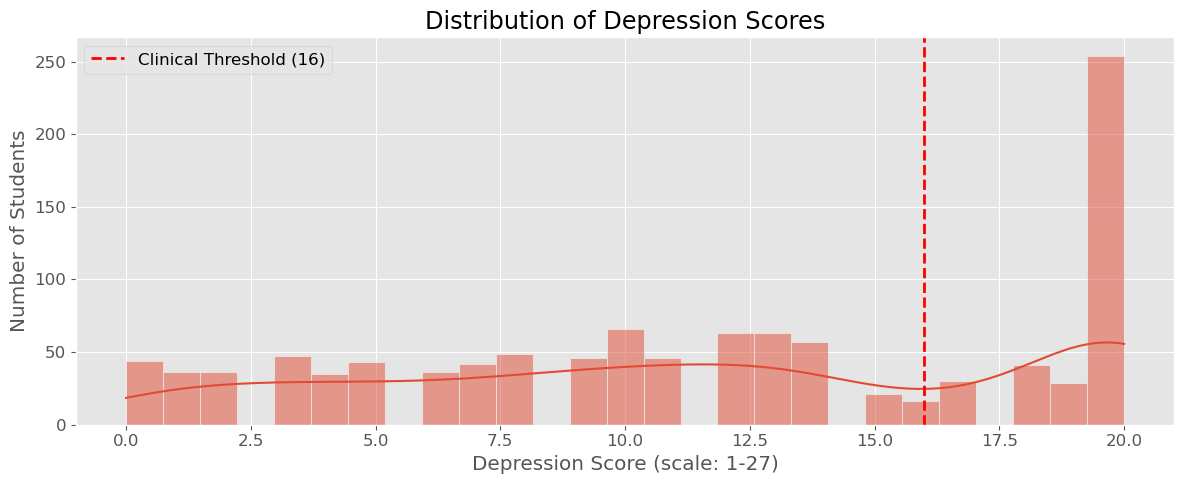

In [7]:
# Calculate how many students have self-esteem below average
avg_self_esteem = df['self_esteem'].mean()
below_avg_self_esteem = df[df['self_esteem'] < avg_self_esteem].shape[0]
percentage_below_avg = (below_avg_self_esteem / len(df)) * 100

# Clinical threshold for depression - typically scores above 16 on scale of 1-27 
# can indicate clinical depression (based on common clinical cutoffs)
clinical_depression_threshold = 16
clinical_depression_count = df[df['depression'] >= clinical_depression_threshold].shape[0]
percentage_clinical_depression = (clinical_depression_count / len(df)) * 100

# Display results
print(f"Self-Esteem Analysis:")
print(f"Average self-esteem score: {avg_self_esteem:.2f} (scale: 1-30)")
print(f"Students with below-average self-esteem: {below_avg_self_esteem} ({percentage_below_avg:.1f}%)")

print(f"\nDepression Analysis:")
print(f"Students with depression at or above clinical threshold (≥{clinical_depression_threshold}): {clinical_depression_count} ({percentage_clinical_depression:.1f}%)")

# Visualize self-esteem distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['self_esteem'], kde=True, bins=30)
plt.axvline(avg_self_esteem, color='red', linestyle='dashed', linewidth=2, label=f'Average ({avg_self_esteem:.2f})')
plt.title('Distribution of Self-Esteem Scores')
plt.xlabel('Self-Esteem Score (scale: 1-30)')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize depression levels with clinical threshold
plt.figure(figsize=(12, 5))
sns.histplot(df['depression'], kde=True, bins=27)
plt.axvline(clinical_depression_threshold, color='red', linestyle='dashed', linewidth=2, 
           label=f'Clinical Threshold ({clinical_depression_threshold})')
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score (scale: 1-27)')
plt.ylabel('Number of Students')
plt.legend()
plt.tight_layout()
plt.show()

About the self esteem we can se the average nearly 18 which is slightly high in a 1-30 range.
At the other hand the depression scores are also high (16) for a 1-20 range. 


## Physiological Factors

    How many suffer frequent headache (≥ 4)?
    What is the mean blood_pressure rating?
    How many rate their sleep_quality as 1 or 2?



Physiological Health Analysis:
Students with frequent headaches (≥ 4): 269 (24.5%)
Mean blood pressure rating: 2.18 (1=Low, 2=Normal, 3=High)
Students with poor sleep quality (1-2): 516 (46.9%)


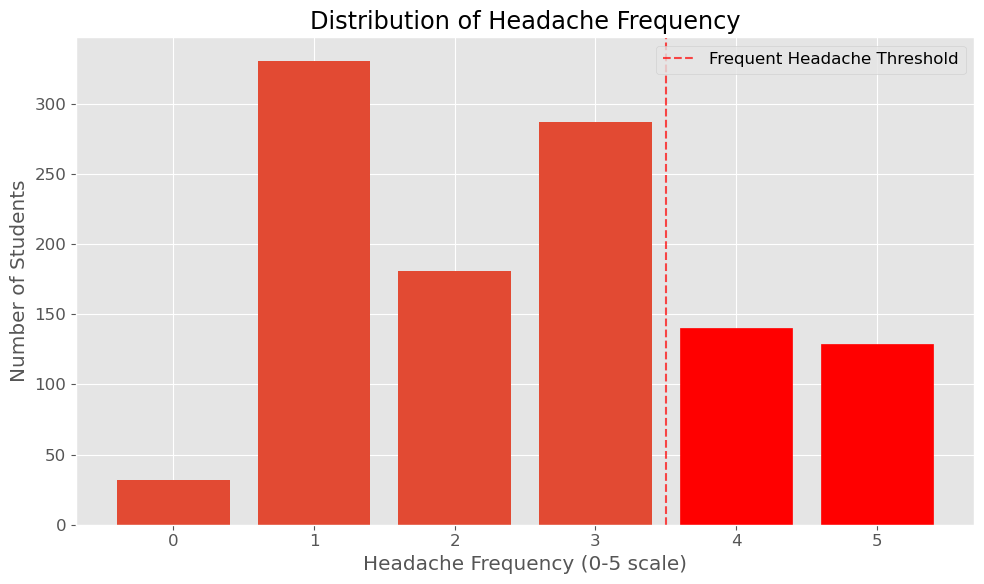

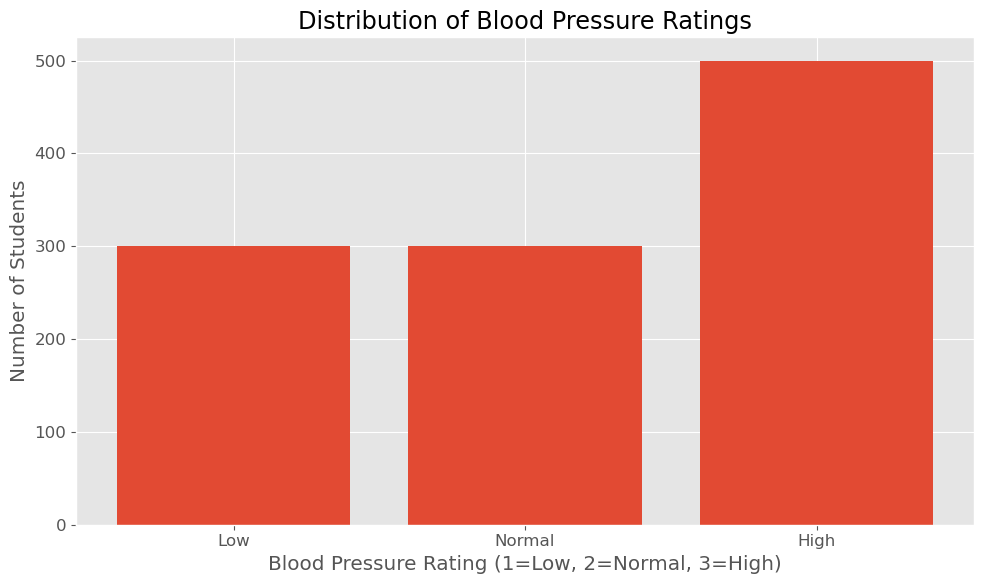

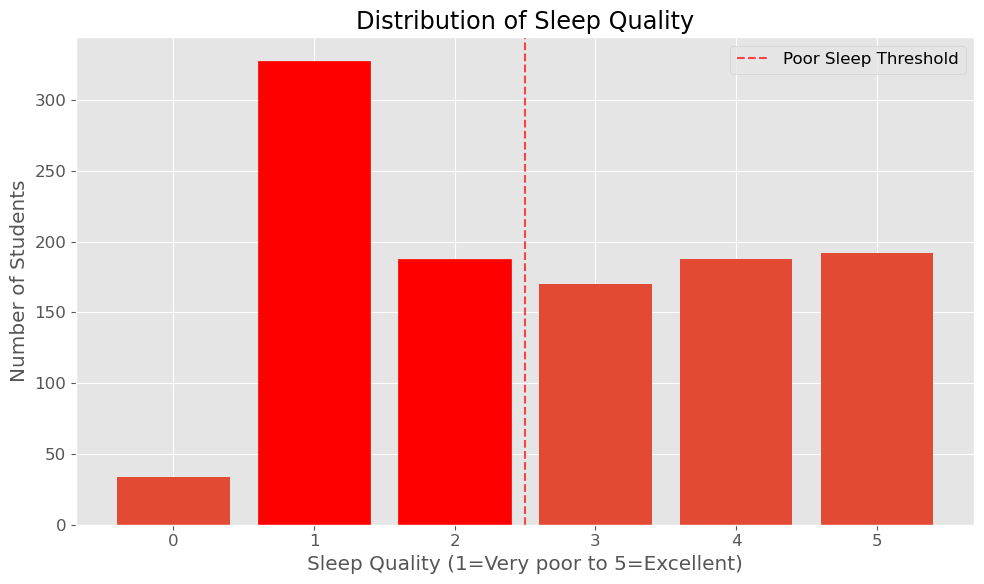

In [8]:
# Calculate how many students have frequent headaches (≥ 4)
frequent_headache_count = df[df['headache'] >= 4].shape[0]
frequent_headache_percent = (frequent_headache_count / len(df)) * 100

# Calculate mean blood pressure rating
mean_blood_pressure = df['blood_pressure'].mean()

# Count students with poor sleep quality (1 or 2)
poor_sleep_count = df[(df['sleep_quality'] == 1) | (df['sleep_quality'] == 2)].shape[0]
poor_sleep_percent = (poor_sleep_count / len(df)) * 100

# Display results
print(f"Physiological Health Analysis:")
print(f"Students with frequent headaches (≥ 4): {frequent_headache_count} ({frequent_headache_percent:.1f}%)")
print(f"Mean blood pressure rating: {mean_blood_pressure:.2f} (1=Low, 2=Normal, 3=High)")
print(f"Students with poor sleep quality (1-2): {poor_sleep_count} ({poor_sleep_percent:.1f}%)")

# Visualize headache frequency
plt.figure(figsize=(10, 6))
headache_counts = df['headache'].value_counts().sort_index()
bars = plt.bar(headache_counts.index, headache_counts.values)
plt.title('Distribution of Headache Frequency')
plt.xlabel('Headache Frequency (0-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight frequent headaches (≥ 4)
for i, bar in enumerate(bars):
    if i >= 4:
        bar.set_color('red')
plt.axvline(x=3.5, color='red', linestyle='--', alpha=0.7, label='Frequent Headache Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize blood pressure distribution
plt.figure(figsize=(10, 6))
bp_counts = df['blood_pressure'].value_counts().sort_index()
plt.bar(bp_counts.index, bp_counts.values)
plt.title('Distribution of Blood Pressure Ratings')
plt.xlabel('Blood Pressure Rating (1=Low, 2=Normal, 3=High)')
plt.ylabel('Number of Students')
plt.xticks([1, 2, 3], ['Low', 'Normal', 'High'])
plt.tight_layout()
plt.show()

# Visualize sleep quality
plt.figure(figsize=(10, 6))
sleep_counts = df['sleep_quality'].value_counts().sort_index()
bars = plt.bar(sleep_counts.index, sleep_counts.values)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality (1=Very poor to 5=Excellent)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight poor sleep quality (1-2)
for i, bar in enumerate(bars):
    if i <= 2 and i > 0:  # Exclude index 0 if it exists
        bar.set_color('red')
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, label='Poor Sleep Threshold')
plt.legend()
plt.tight_layout()
plt.show()

There is a significant amount of students who have very poor sleep quality, and high blood pressure.
The headache frequency doesnt seem to be too elevated.


##Environmental Factors

    How many live with noise_level ≥ 4?
    What percentage feel unsafe (safety ≤ 2)?
    How many have basic_needs ≤ 2?


Environmental Factors Analysis:
Students living with high noise levels (≥ 4): 274 (24.9%)
Students feeling unsafe (safety ≤ 2): 565 (51.4%)
Students with inadequate basic needs (≤ 2): 548 (49.8%)


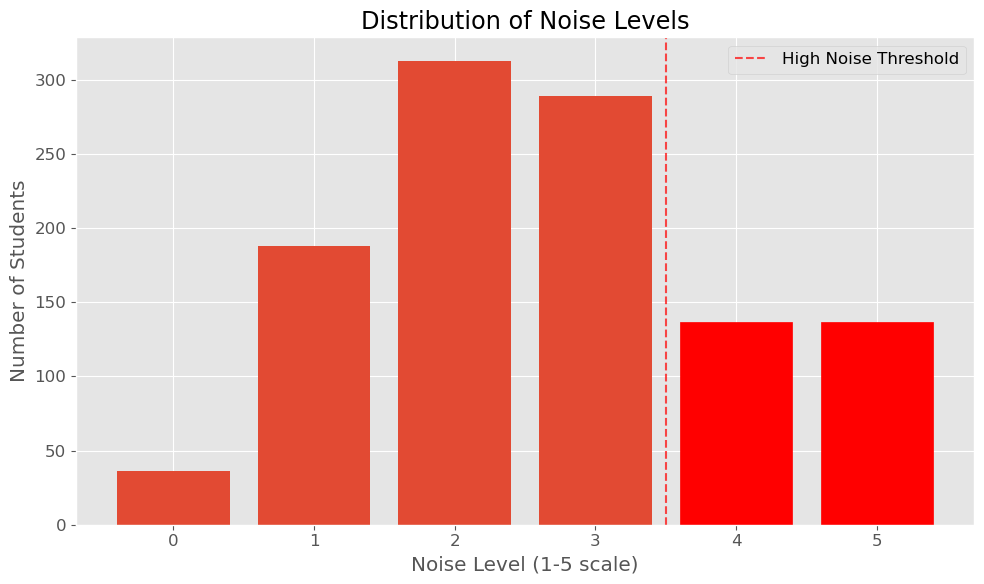

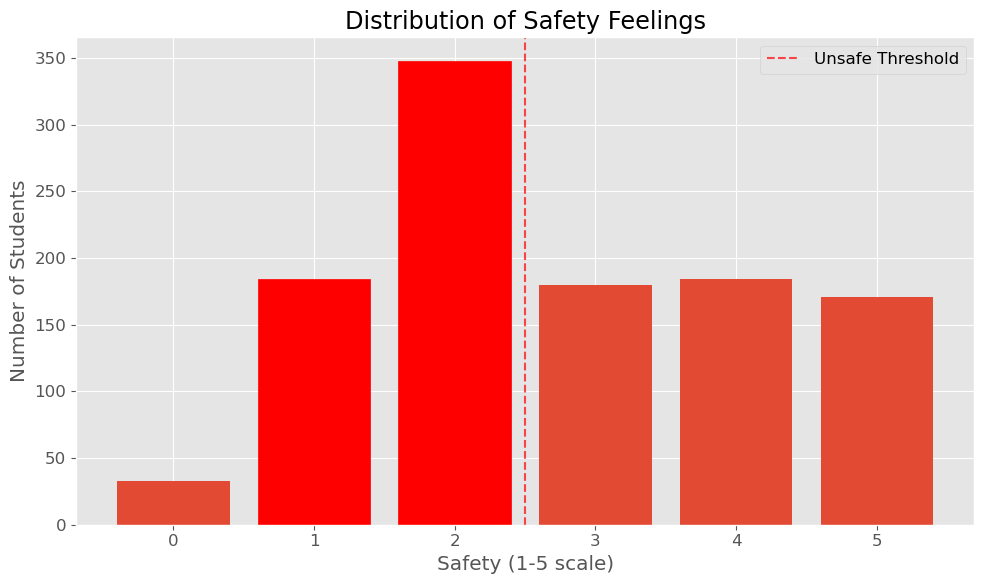

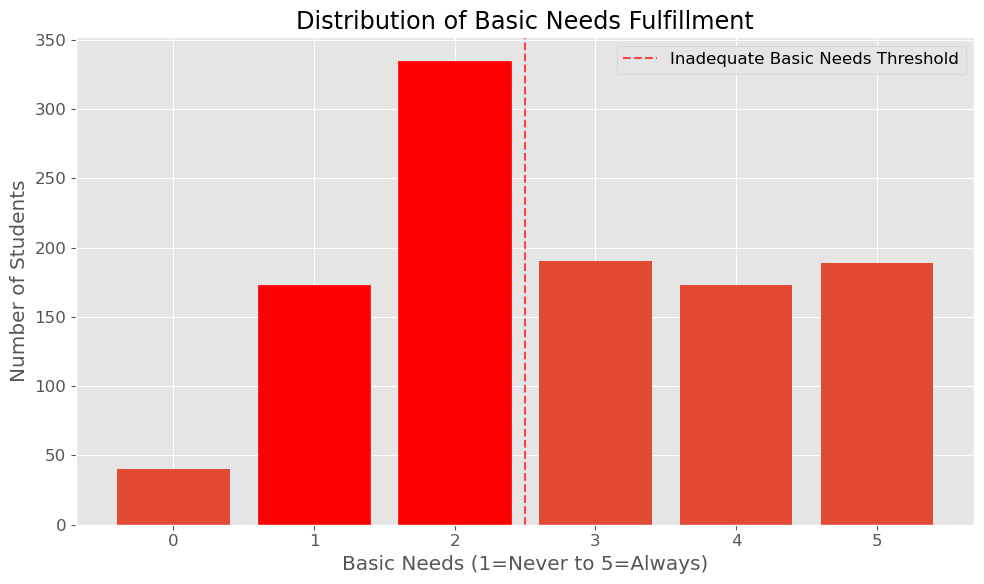

<Figure size 1200x600 with 0 Axes>

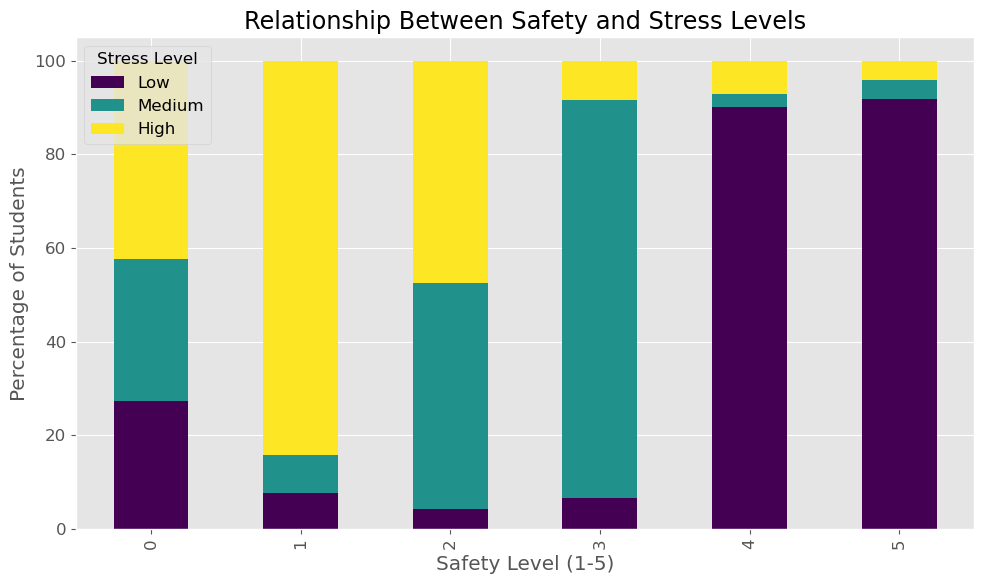

In [9]:
# Calculate how many students live with high noise levels (≥ 4)
high_noise_count = df[df['noise_level'] >= 4].shape[0]
high_noise_percent = (high_noise_count / len(df)) * 100

# Calculate percentage of students who feel unsafe (safety ≤ 2)
unsafe_count = df[df['safety'] <= 2].shape[0]
unsafe_percent = (unsafe_count / len(df)) * 100

# Calculate how many students have inadequate basic needs (≤ 2)
basic_needs_inadequate_count = df[df['basic_needs'] <= 2].shape[0]
basic_needs_inadequate_percent = (basic_needs_inadequate_count / len(df)) * 100

# Display results
print(f"Environmental Factors Analysis:")
print(f"Students living with high noise levels (≥ 4): {high_noise_count} ({high_noise_percent:.1f}%)")
print(f"Students feeling unsafe (safety ≤ 2): {unsafe_count} ({unsafe_percent:.1f}%)")
print(f"Students with inadequate basic needs (≤ 2): {basic_needs_inadequate_count} ({basic_needs_inadequate_percent:.1f}%)")

# Visualize noise levels
plt.figure(figsize=(10, 6))
noise_counts = df['noise_level'].value_counts().sort_index()
bars = plt.bar(noise_counts.index, noise_counts.values)
plt.title('Distribution of Noise Levels')
plt.xlabel('Noise Level (1-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight high noise levels (≥ 4)
for i, bar in enumerate(bars):
    if i >= 4:
        bar.set_color('red')
plt.axvline(x=3.5, color='red', linestyle='--', alpha=0.7, label='High Noise Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize safety levels
plt.figure(figsize=(10, 6))
safety_counts = df['safety'].value_counts().sort_index()
bars = plt.bar(safety_counts.index, safety_counts.values)
plt.title('Distribution of Safety Feelings')
plt.xlabel('Safety (1-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight unsafe feelings (≤ 2)
for i, bar in enumerate(bars):
    if i <= 2 and i > 0:  # Exclude index 0 if it exists
        bar.set_color('red')
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, label='Unsafe Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize basic needs
plt.figure(figsize=(10, 6))
basic_needs_counts = df['basic_needs'].value_counts().sort_index()
bars = plt.bar(basic_needs_counts.index, basic_needs_counts.values)
plt.title('Distribution of Basic Needs Fulfillment')
plt.xlabel('Basic Needs (1=Never to 5=Always)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight inadequate basic needs (≤ 2)
for i, bar in enumerate(bars):
    if i <= 2 and i > 0:  # Exclude index 0 if it exists
        bar.set_color('red')
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, label='Inadequate Basic Needs Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Create stacked bar chart showing the relationship between safety and stress
plt.figure(figsize=(12, 6))
safety_stress = pd.crosstab(df['safety'], df['stress_level'], normalize='index') * 100
safety_stress.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Relationship Between Safety and Stress Levels')
plt.xlabel('Safety Level (1-5)')
plt.ylabel('Percentage of Students')
plt.legend(title='Stress Level', labels=['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()

There is a very high number of students feeling unsafe (over 50%), aswell as students with inadequate basic needs (nearly 50%). 
At the other hand we can observe that the safety levels are very correlated to the stress levels, students that dont feel safe tend to have higher stress levels. 

## Academic Factors

    How many rate academic_performance below 3?
    Average study_load.
    How many express future_career_concerns ≥ 4?


Academic Factors Analysis:
Students rating academic performance below 3 (excluding no opinion): 533 (49.7%)
Average study load (excluding no opinion): 2.71
Students with high future career concerns ≥ 4 (excluding no opinion): 371 (34.7%)


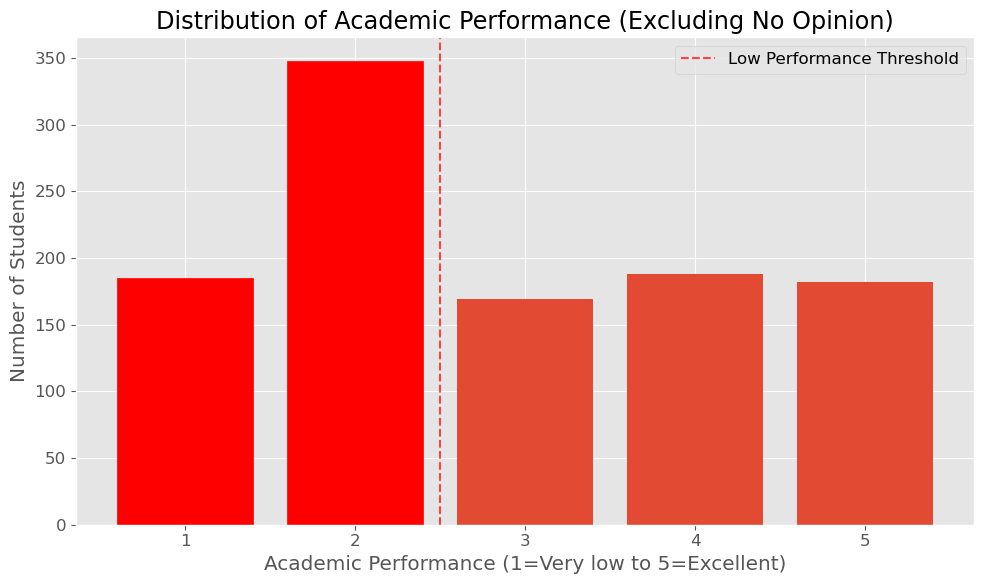

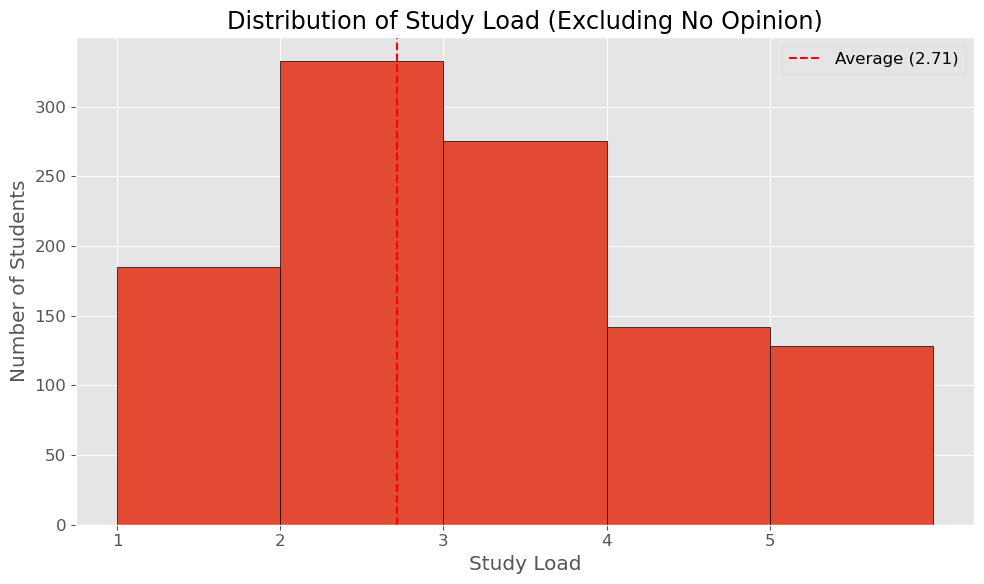

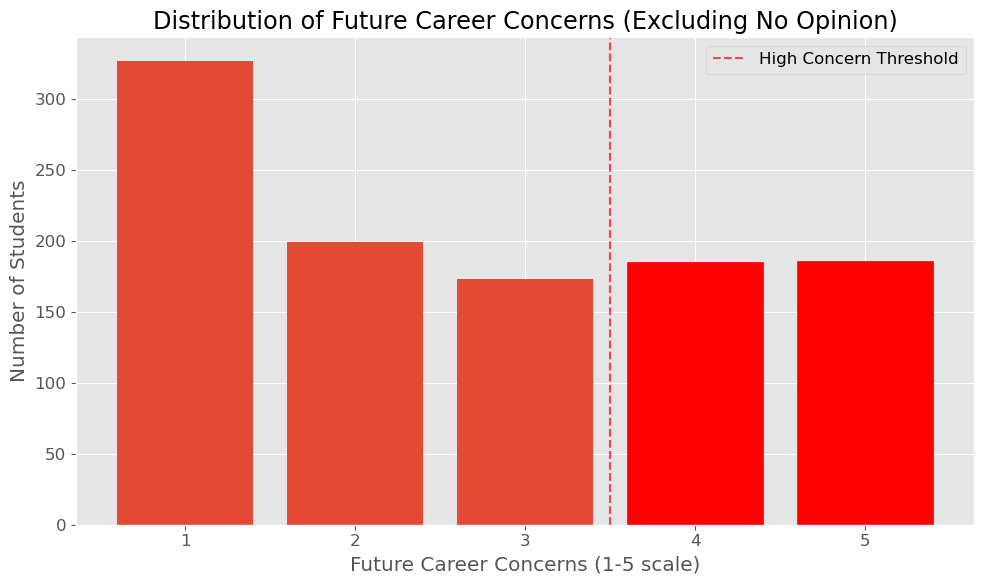

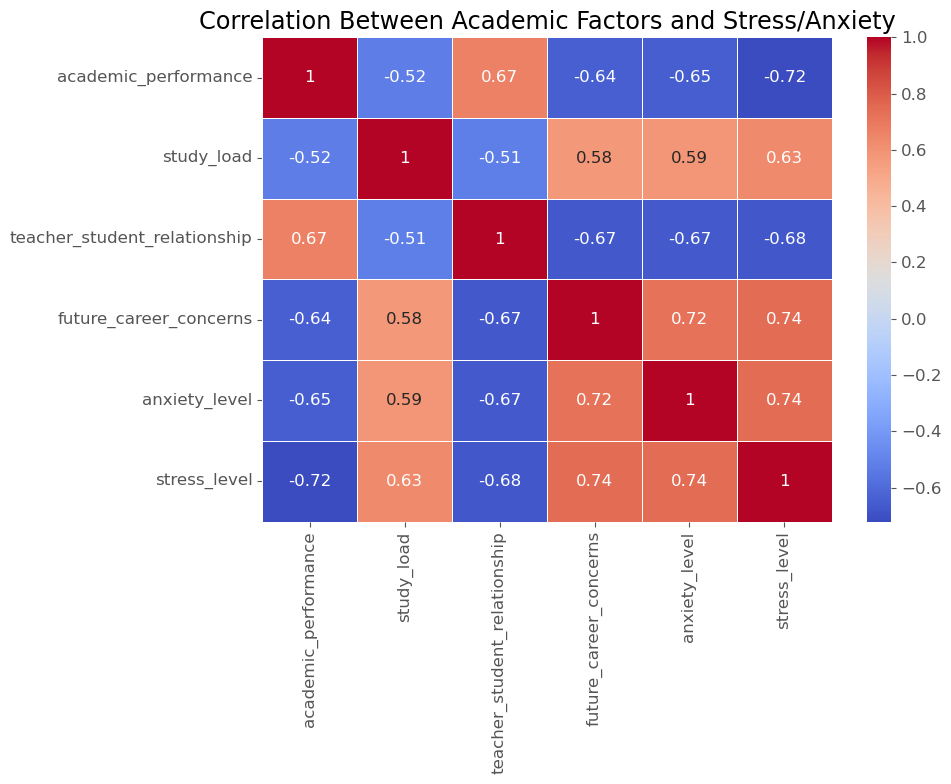


Key Correlations in Academic Factors:
1. future_career_concerns and stress_level: 0.743
   This strong positive correlation suggests that as future_career_concerns increases, stress_level tends to increase as well.
   Greater concerns about future careers are associated with higher psychological distress, indicating career uncertainty is a significant stressor.
2. anxiety_level and stress_level: 0.739
   This strong positive correlation suggests that as anxiety_level increases, stress_level tends to increase as well.
   Students with higher anxiety levels tend to experience higher stress levels, suggesting these psychological factors are closely related.
3. academic_performance and stress_level: -0.721
   This strong negative correlation suggests that as academic_performance increases, stress_level tends to decrease.
4. future_career_concerns and anxiety_level: 0.718
   This strong positive correlation suggests that as future_career_concerns increases, anxiety_level tends to increase 

In [10]:
# Calculate how many students rate their academic performance below 3
# Excluding 0 values (no opinion)
academic_df = df[df['academic_performance'] > 0]
low_academic_count = academic_df[academic_df['academic_performance'] < 3].shape[0]
low_academic_percent = (low_academic_count / len(academic_df)) * 100

# Calculate average study load (excluding 0 values)
study_load_df = df[df['study_load'] > 0]
avg_study_load = study_load_df['study_load'].mean()

# Calculate how many express high future career concerns (≥ 4)
# Excluding 0 values (no opinion)
career_concerns_df = df[df['future_career_concerns'] > 0]
high_career_concerns_count = career_concerns_df[career_concerns_df['future_career_concerns'] >= 4].shape[0]
high_career_concerns_percent = (high_career_concerns_count / len(career_concerns_df)) * 100

# Display results
print(f"Academic Factors Analysis:")
print(f"Students rating academic performance below 3 (excluding no opinion): {low_academic_count} ({low_academic_percent:.1f}%)")
print(f"Average study load (excluding no opinion): {avg_study_load:.2f}")
print(f"Students with high future career concerns ≥ 4 (excluding no opinion): {high_career_concerns_count} ({high_career_concerns_percent:.1f}%)")

# Visualize academic performance (excluding 0 values)
plt.figure(figsize=(10, 6))
academic_counts = academic_df['academic_performance'].value_counts().sort_index()
bars = plt.bar(academic_counts.index, academic_counts.values)
plt.title('Distribution of Academic Performance (Excluding No Opinion)')
plt.xlabel('Academic Performance (1=Very low to 5=Excellent)')
plt.ylabel('Number of Students')
plt.xticks(range(1, 6))  # Starting from 1, not 0

# Highlight low academic performance (< 3)
for i, val in enumerate(academic_counts.index):
    if val < 3:
        bars[i].set_color('red')
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, label='Low Performance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize study load (excluding 0 values)
plt.figure(figsize=(10, 6))
plt.hist(study_load_df['study_load'], bins=5, edgecolor='black', range=(1, 6))
plt.axvline(x=avg_study_load, color='red', linestyle='--', label=f'Average ({avg_study_load:.2f})')
plt.title('Distribution of Study Load (Excluding No Opinion)')
plt.xlabel('Study Load')
plt.ylabel('Number of Students')
plt.xticks(range(1, 6))  # Starting from 1, not 0
plt.legend()
plt.tight_layout()
plt.show()

# Visualize future career concerns (excluding 0 values)
plt.figure(figsize=(10, 6))
career_counts = career_concerns_df['future_career_concerns'].value_counts().sort_index()
bars = plt.bar(career_counts.index, career_counts.values)
plt.title('Distribution of Future Career Concerns (Excluding No Opinion)')
plt.xlabel('Future Career Concerns (1-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(1, 6))  # Starting from 1, not 0

# Highlight high career concerns (≥ 4)
for i, val in enumerate(career_counts.index):
    if val >= 4:
        bars[i].set_color('red')
plt.axvline(x=3.5, color='red', linestyle='--', alpha=0.7, label='High Concern Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Create a correlation heatmap for academic factors
academic_cols = ['academic_performance', 'study_load', 'teacher_student_relationship', 
                'future_career_concerns', 'anxiety_level', 'stress_level']
plt.figure(figsize=(10, 8))
corr_matrix = df[academic_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Academic Factors and Stress/Anxiety')
plt.tight_layout()
plt.show()

# Identify and explain the most important correlations
print("\nKey Correlations in Academic Factors:")

# Get the top 5 strongest correlations (absolute value)
corr_pairs = []
for i in range(len(academic_cols)):
    for j in range(i+1, len(academic_cols)):
        corr_pairs.append((academic_cols[i], academic_cols[j], abs(corr_matrix.iloc[i, j]), corr_matrix.iloc[i, j]))

# Sort by absolute correlation value (descending)
corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the top correlations with interpretations
for i, (var1, var2, abs_corr, corr) in enumerate(corr_pairs[:5]):
    print(f"{i+1}. {var1} and {var2}: {corr:.3f}")
    
    # Provide interpretation based on correlation direction and strength
    if abs_corr < 0.3:
        strength = "weak"
    elif abs_corr < 0.6:
        strength = "moderate"
    else:
        strength = "strong"
    
    if corr > 0:
        print(f"   This {strength} positive correlation suggests that as {var1} increases, {var2} tends to increase as well.")
    else:
        print(f"   This {strength} negative correlation suggests that as {var1} increases, {var2} tends to decrease.")
    
    # Add specific interpretations for key relationships
    if var1 == 'anxiety_level' and var2 == 'stress_level':
        print("   Students with higher anxiety levels tend to experience higher stress levels, suggesting these psychological factors are closely related.")
    
    elif var1 == 'academic_performance' and var2 == 'anxiety_level':
        if corr < 0:
            print("   Better academic performance is associated with lower anxiety levels, suggesting academic success may reduce psychological distress.")
        else:
            print("   Interestingly, better academic performance is associated with higher anxiety levels, suggesting high-achieving students may experience more pressure.")
    
    elif var1 == 'study_load' and var2 == 'stress_level':
        if corr > 0:
            print("   Higher study loads are associated with higher stress levels, indicating workload management is important for student wellbeing.")
        else:
            print("   Surprisingly, higher study loads are associated with lower stress levels, suggesting effective study habits may mitigate stress.")
    
    elif var1 == 'teacher_student_relationship' and var2 in ['anxiety_level', 'stress_level']:
        if corr < 0:
            print("   Better teacher-student relationships are associated with lower psychological distress, highlighting the importance of supportive academic environments.")
        else:
            print("   Unexpectedly, better teacher-student relationships are associated with higher psychological distress, which may warrant further investigation.")
    
    elif var1 == 'future_career_concerns' and var2 in ['anxiety_level', 'stress_level']:
        if corr > 0:
            print("   Greater concerns about future careers are associated with higher psychological distress, indicating career uncertainty is a significant stressor.")

## Social Factors

    How many report social_support ≥ 4?
    Percentage experiencing bullying ≥ 3.
    How many join ≥ 1 extracurricular_activities?


Social Factors Analysis:
Students reporting high social support (≥ 3): 458 (41.6%)
Students experiencing significant bullying (≥ 3): 559 (50.8%)
Students participating in extracurricular activities (≥ 1): 1066 (96.9%)
Students experiencing high peer pressure (≥ 4): 355 (32.3%)


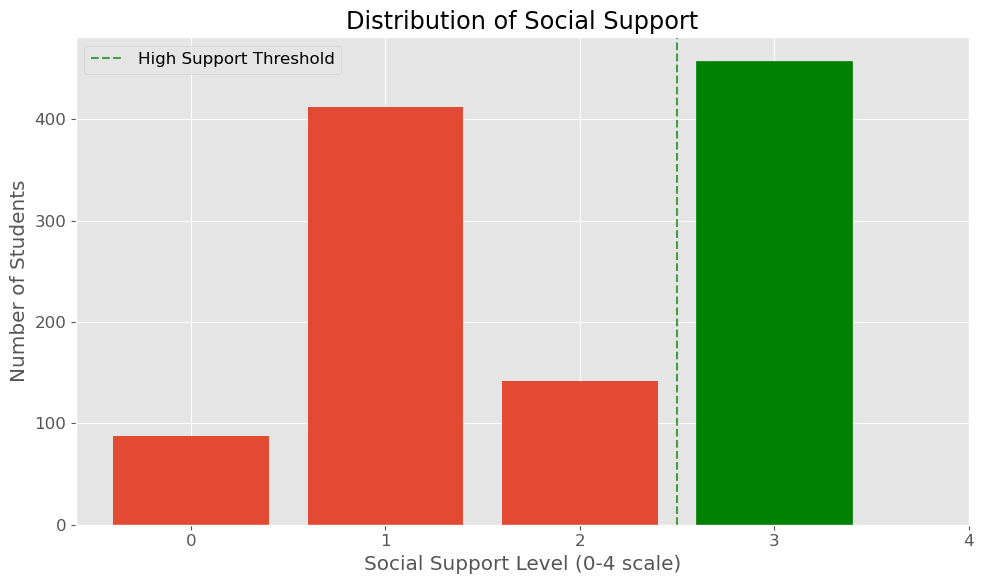

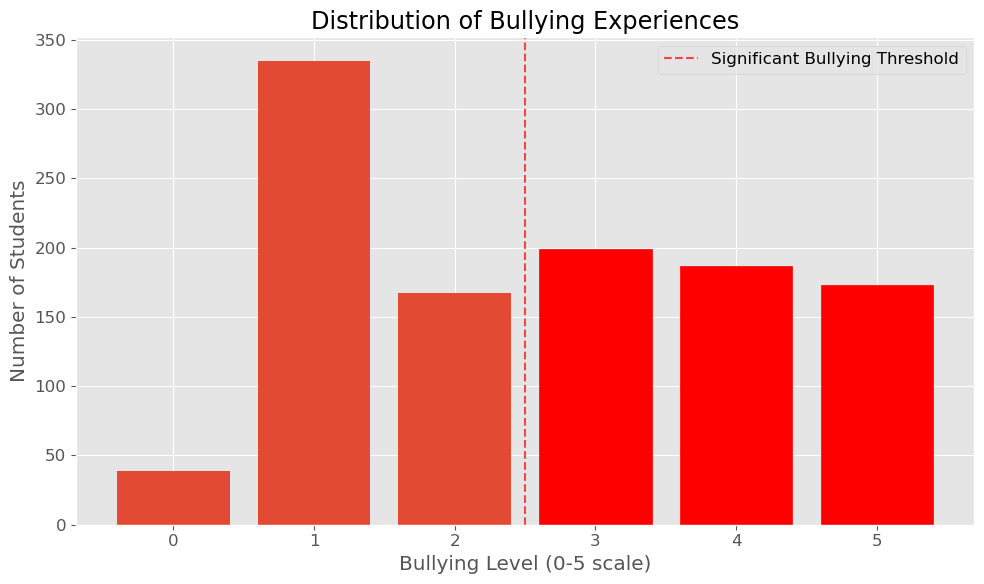

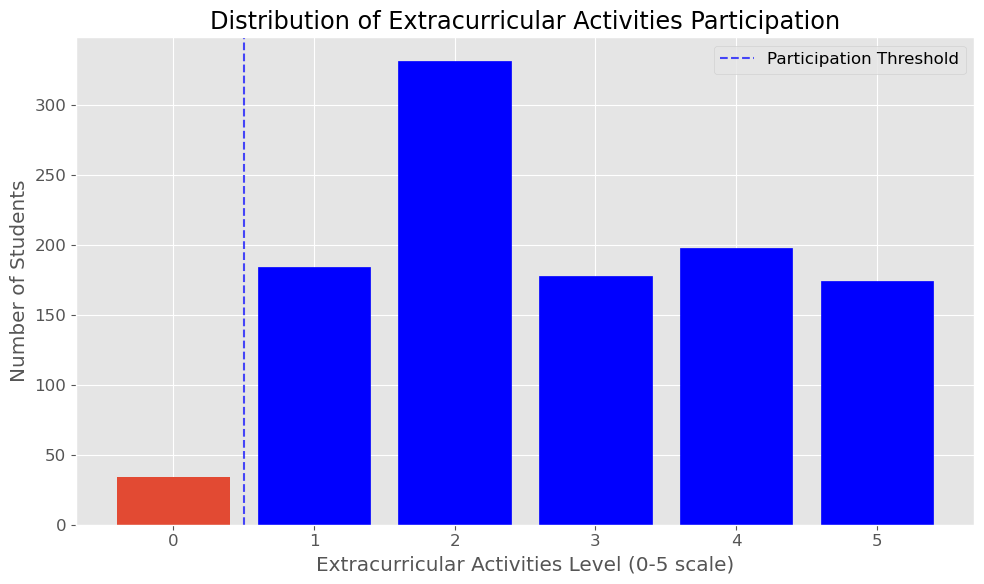

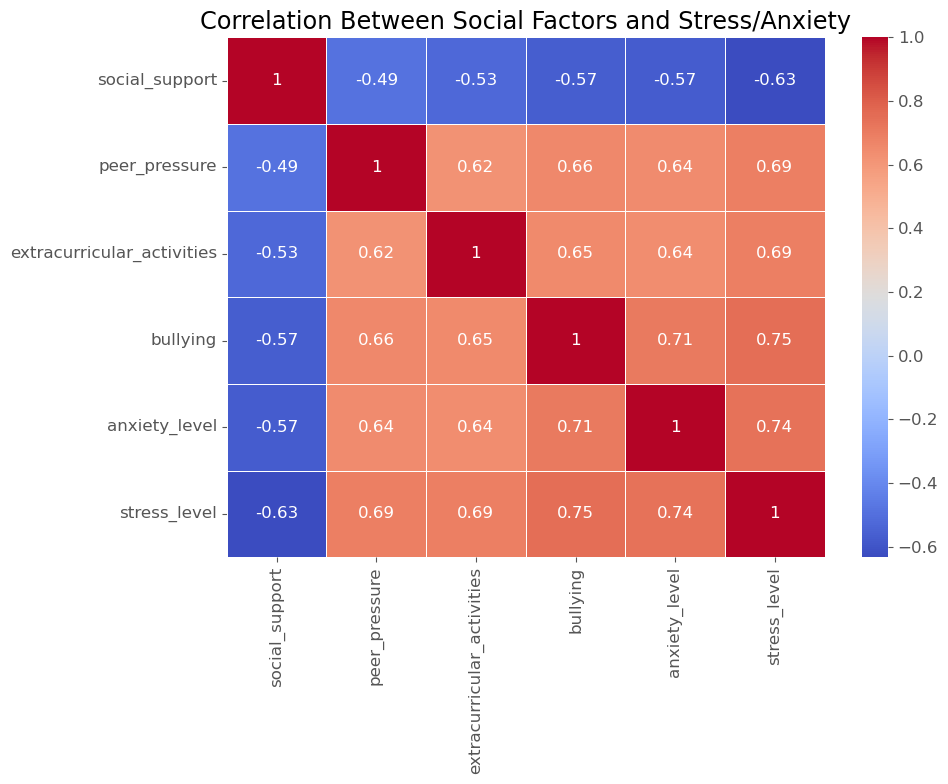

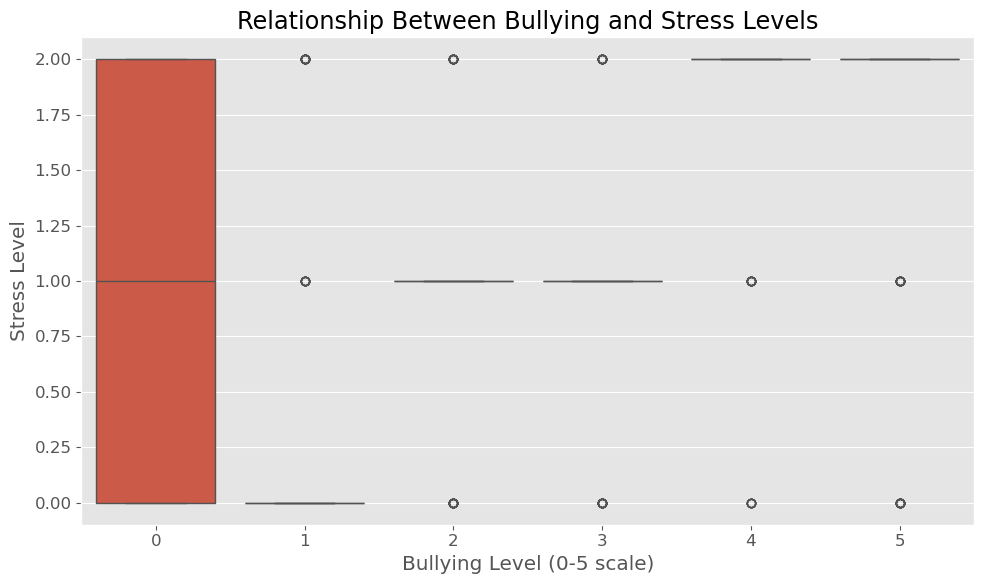

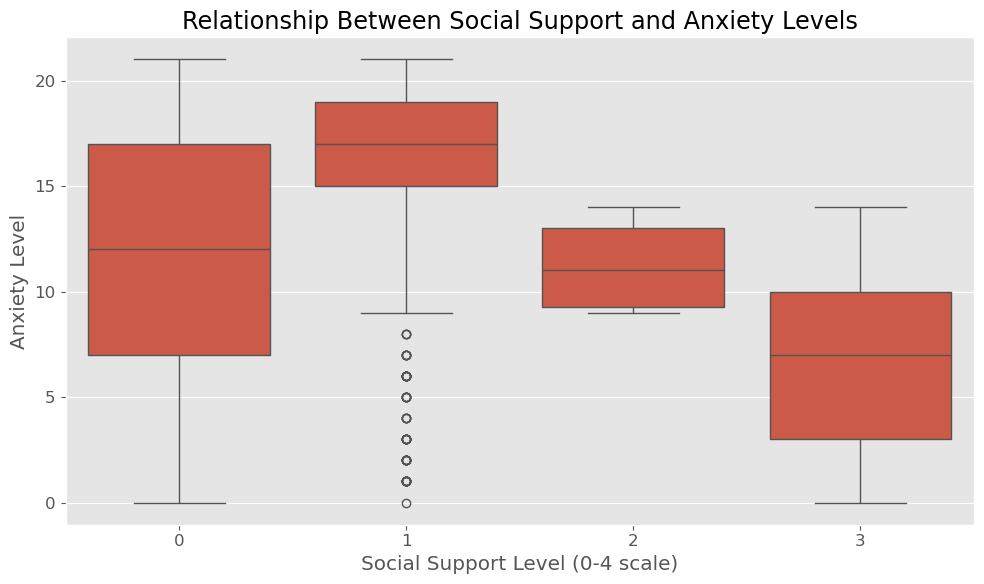

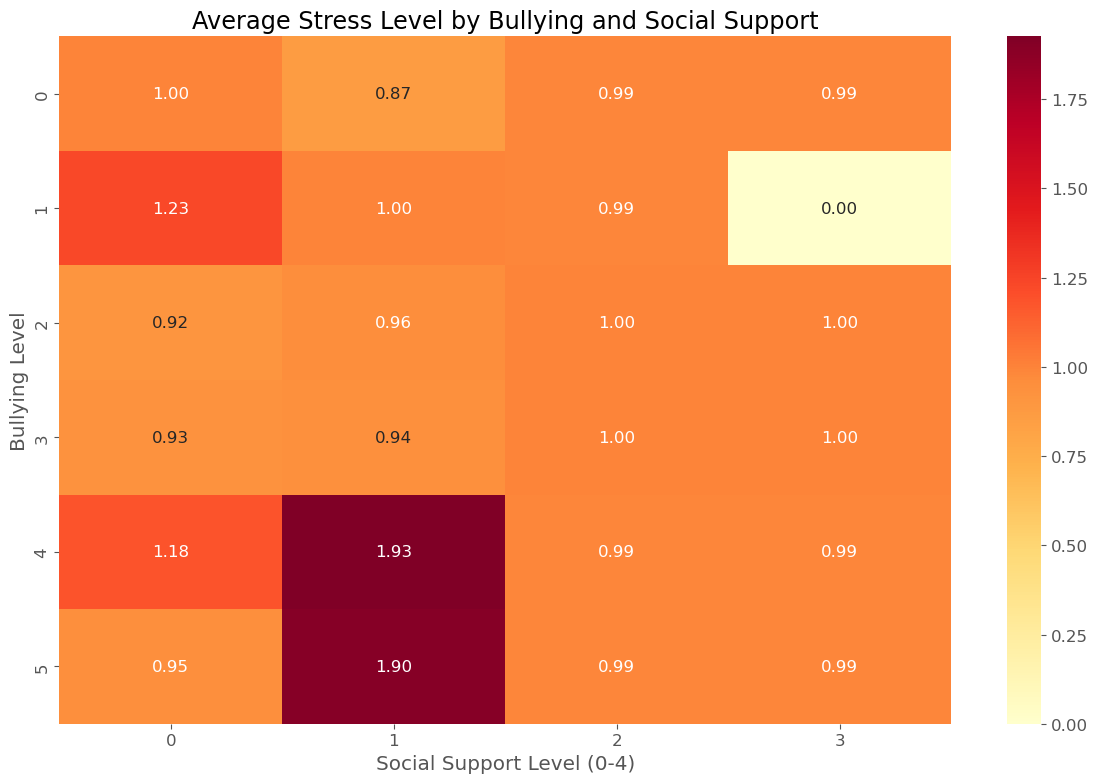


Key Insights from Social Factors Analysis:
1. Impact of Social Support on Stress:
   Strong negative correlation (-0.63) indicates higher social support is associated with lower stress levels

2. Impact of Bullying on Anxiety:
   Positive correlation (0.71) indicates bullying experiences are associated with higher anxiety levels

3. Extracurricular Activities and Mental Health:
   Interestingly, participation in extracurricular activities is associated with higher anxiety (0.64) and stress (0.69) levels


In [18]:
# Analysis of Social Factors

# 1. First check for problematic values
# Fix NaN values or infinite values
#print("Checking for NaN values in social factor columns:")
social_cols = ['social_support', 'peer_pressure', 'extracurricular_activities', 
               'bullying', 'anxiety_level', 'stress_level']
#print(df[social_cols].isnull().sum())

# 2. Handle NaN values globally
df_social = df.copy()
# Replace NaN with median values for each column
for col in social_cols:
    if df_social[col].isnull().any():
        median_val = df_social[col].median()
        df_social[col] = df_social[col].fillna(median_val)

# 3. Handle potential infinite values
df_social = df_social.replace([np.inf, -np.inf], np.nan)
df_social = df_social.ffill() 

# Now use df_social instead of df for all your social factors analysis

# Calculate how many students report high social support (≥ 3)
# Note: Based on your clarification, social_support scale is 0-4
high_social_support_count = df_social[df_social['social_support'] >= 3].shape[0]
high_social_support_percent = (high_social_support_count / len(df_social)) * 100

# Calculate percentage experiencing significant bullying (≥ 3)
significant_bullying_count = df_social[df_social['bullying'] >= 3].shape[0]
significant_bullying_percent = (significant_bullying_count / len(df_social)) * 100

# Calculate how many join at least one extracurricular activity
extracurricular_count = df_social[df_social['extracurricular_activities'] >= 1].shape[0]
extracurricular_percent = (extracurricular_count / len(df_social)) * 100

# Calculate peer pressure statistics
high_peer_pressure_count = df_social[df_social['peer_pressure'] >= 4].shape[0]
high_peer_pressure_percent = (high_peer_pressure_count / len(df_social)) * 100

# Display results
print("Social Factors Analysis:")
print(f"Students reporting high social support (≥ 3): {high_social_support_count} ({high_social_support_percent:.1f}%)")
print(f"Students experiencing significant bullying (≥ 3): {significant_bullying_count} ({significant_bullying_percent:.1f}%)")
print(f"Students participating in extracurricular activities (≥ 1): {extracurricular_count} ({extracurricular_percent:.1f}%)")
print(f"Students experiencing high peer pressure (≥ 4): {high_peer_pressure_count} ({high_peer_pressure_percent:.1f}%)")

# Visualize social support distribution
plt.figure(figsize=(10, 6))
social_support_counts = df_social['social_support'].value_counts().sort_index()
bars = plt.bar(social_support_counts.index, social_support_counts.values)
plt.title('Distribution of Social Support')
plt.xlabel('Social Support Level (0-4 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(5))  # Updated to 0-4 scale

# Highlight high social support (≥ 3)
for i, bar in enumerate(bars):
    if i >= 3:
        bar.set_color('green')
plt.axvline(x=2.5, color='green', linestyle='--', alpha=0.7, label='High Support Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize bullying experiences
plt.figure(figsize=(10, 6))
bullying_counts = df_social['bullying'].value_counts().sort_index()
bars = plt.bar(bullying_counts.index, bullying_counts.values)
plt.title('Distribution of Bullying Experiences')
plt.xlabel('Bullying Level (0-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight significant bullying (≥ 3)
for i, bar in enumerate(bars):
    if i >= 3:
        bar.set_color('red')
plt.axvline(x=2.5, color='red', linestyle='--', alpha=0.7, label='Significant Bullying Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize extracurricular activities
plt.figure(figsize=(10, 6))
extracurricular_counts = df_social['extracurricular_activities'].value_counts().sort_index()
bars = plt.bar(extracurricular_counts.index, extracurricular_counts.values)
plt.title('Distribution of Extracurricular Activities Participation')
plt.xlabel('Extracurricular Activities Level (0-5 scale)')
plt.ylabel('Number of Students')
plt.xticks(range(6))

# Highlight participation in activities (≥ 1)
for i, bar in enumerate(bars):
    if i >= 1:
        bar.set_color('blue')
plt.axvline(x=0.5, color='blue', linestyle='--', alpha=0.7, label='Participation Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Create a correlation heatmap for social factors and stress/anxiety
social_cols = ['social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'anxiety_level', 'stress_level']
plt.figure(figsize=(10, 8))
social_corr = df_social[social_cols].corr()
sns.heatmap(social_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Social Factors and Stress/Anxiety')
plt.tight_layout()
plt.show()

# Analyze relationship between bullying and stress levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='bullying', y='stress_level', data=df_social)
plt.title('Relationship Between Bullying and Stress Levels')
plt.xlabel('Bullying Level (0-5 scale)')
plt.ylabel('Stress Level')
plt.tight_layout()
plt.show()

# Analyze relationship between social support and anxiety
plt.figure(figsize=(10, 6))
sns.boxplot(x='social_support', y='anxiety_level', data=df_social)
plt.title('Relationship Between Social Support and Anxiety Levels')
plt.xlabel('Social Support Level (0-4 scale)')  # Updated to 0-4 scale
plt.ylabel('Anxiety Level')
plt.tight_layout()
plt.show()

# Analyze the combined effect of social support and bullying on stress
plt.figure(figsize=(12, 8))
social_pivot = pd.pivot_table(df_social, values='stress_level', index='bullying', columns='social_support', aggfunc='mean')
# Fill NaN values in the pivot table
social_pivot = social_pivot.fillna(social_pivot.mean().mean())  # Fill with overall mean
sns.heatmap(social_pivot, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Stress Level by Bullying and Social Support')
plt.xlabel('Social Support Level (0-4)')  # Updated to 0-4 scale
plt.ylabel('Bullying Level')
plt.tight_layout()
plt.show()

# Provide key insights from social factors analysis
print("\nKey Insights from Social Factors Analysis:")
print("1. Impact of Social Support on Stress:")
support_stress_corr = social_corr.loc['social_support', 'stress_level']
if support_stress_corr < -0.2:
    print(f"   Strong negative correlation ({support_stress_corr:.2f}) indicates higher social support is associated with lower stress levels")
elif support_stress_corr > 0.2:
    print(f"   Unexpectedly, higher social support is positively correlated ({support_stress_corr:.2f}) with stress levels")
else:
    print(f"   Weak correlation ({support_stress_corr:.2f}) between social support and stress levels")

print("\n2. Impact of Bullying on Anxiety:")
bullying_anxiety_corr = social_corr.loc['bullying', 'anxiety_level']
if bullying_anxiety_corr > 0.2:
    print(f"   Positive correlation ({bullying_anxiety_corr:.2f}) indicates bullying experiences are associated with higher anxiety levels")
elif bullying_anxiety_corr < -0.2:
    print(f"   Unexpectedly, bullying has a negative correlation ({bullying_anxiety_corr:.2f}) with anxiety levels")
else:
    print(f"   Weak correlation ({bullying_anxiety_corr:.2f}) between bullying and anxiety levels")

print("\n3. Extracurricular Activities and Mental Health:")
extra_anxiety_corr = social_corr.loc['extracurricular_activities', 'anxiety_level']
extra_stress_corr = social_corr.loc['extracurricular_activities', 'stress_level']
if extra_anxiety_corr < -0.1 or extra_stress_corr < -0.1:
    print(f"   Participation in extracurricular activities is associated with lower anxiety ({extra_anxiety_corr:.2f}) and stress ({extra_stress_corr:.2f}) levels")
elif extra_anxiety_corr > 0.1 or extra_stress_corr > 0.1:
    print(f"   Interestingly, participation in extracurricular activities is associated with higher anxiety ({extra_anxiety_corr:.2f}) and stress ({extra_stress_corr:.2f}) levels")
else:
    print(f"   Limited correlation between extracurricular activities and mental health metrics (anxiety: {extra_anxiety_corr:.2f}, stress: {extra_stress_corr:.2f})")

## Comparative Analysis

    Is there a correlation between anxiety_level and academic_performance?
    Do students with poor sleep_quality (≤ 2) also show higher depression?
    Are students who experience bullying more likely to have a mental‑health history?


Advanced Analysis of Key Relationships:

1. Anxiety Level and Academic Performance:
   Correlation coefficient: -0.652
   There is a negative correlation: students with higher anxiety tend to have lower academic performance.

2. Sleep Quality and Depression:
   Average depression score for students with poor sleep (≤ 2): 15.82
   Average depression score for students with better sleep (> 2): 7.65
   Difference: 8.17 (106.8% higher in poor sleep group)

3. Bullying and Mental Health History:
   Percentage of students with mental health history in high bullying group (≥ 3): 76.4%
   Percentage of students with mental health history in low bullying group (< 3): 21.3%
   Difference: 55.1 percentage points


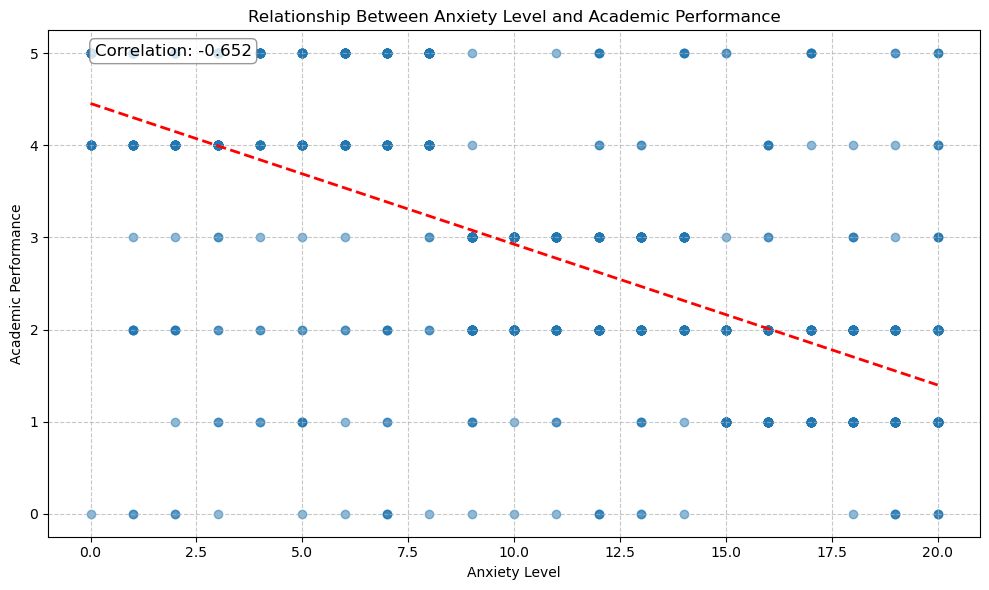

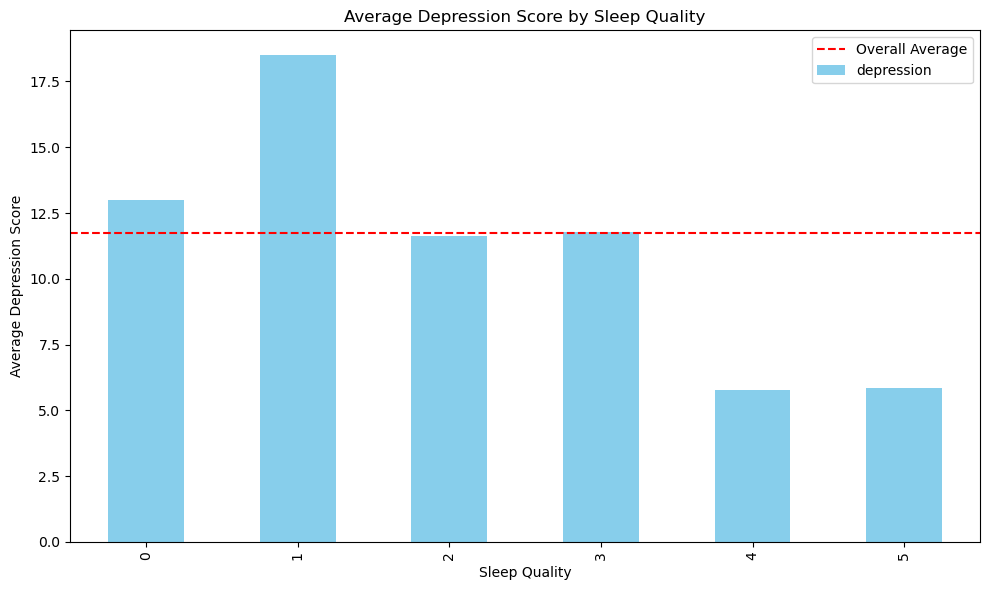

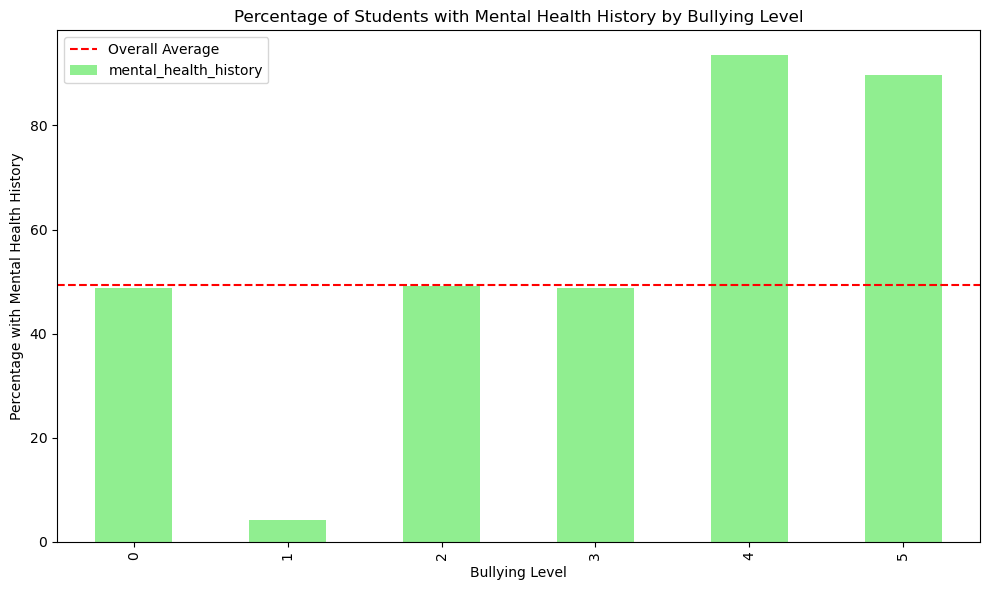

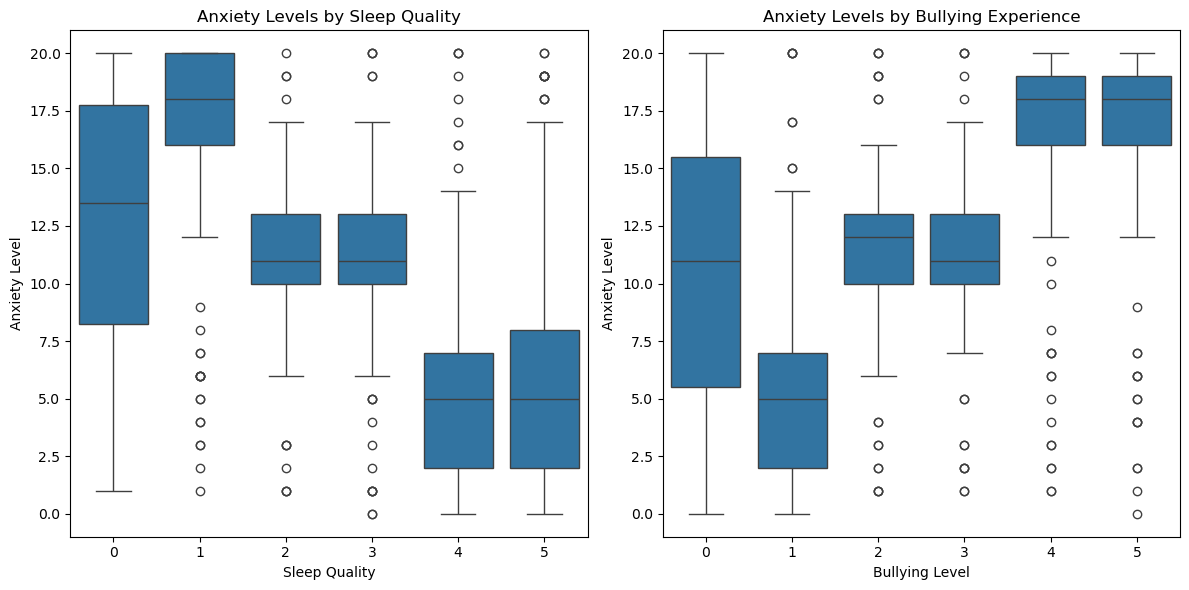


====== CONCLUSIONS ======

Key Findings from the Analysis:

1. Anxiety and Academic Performance:
   The negative correlation between anxiety and academic performance suggests that
   higher anxiety levels may be detrimental to students' academic achievements.
   This highlights the importance of addressing anxiety for improving academic outcomes.

2. Sleep Quality and Depression:
   Students with poor sleep quality (≤ 2) show significantly higher depression scores
   (15.82 vs 7.65, 106.8% higher).
   This strong association suggests that improving sleep quality could be an
   important intervention target for reducing depression among students.

3. Bullying and Mental Health History:
   Students experiencing higher levels of bullying (≥ 3) are much more likely
   to report a mental health history (76.4% vs 21.3%).
   This strong association suggests that bullying experiences may contribute to
   mental health issues, or that students with pre-existing mental health conditions
   may 

In [25]:
# Advanced Analysis: Relationships Between Key Factors

# 1. Correlation between anxiety level and academic performance
anxiety_academic_corr = df['anxiety_level'].corr(df['academic_performance'])

# 2. Sleep quality vs depression
poor_sleep_df = df[df['sleep_quality'] <= 2]
good_sleep_df = df[df['sleep_quality'] > 2]

poor_sleep_depression = poor_sleep_df['depression'].mean()
good_sleep_depression = good_sleep_df['depression'].mean()
depression_diff_pct = ((poor_sleep_depression - good_sleep_depression) / good_sleep_depression) * 100

# 3. Bullying and mental health history
bullying_groups = df.groupby('bullying')['mental_health_history'].mean()
high_bullying_mental_health = df[df['bullying'] >= 3]['mental_health_history'].mean() * 100
low_bullying_mental_health = df[df['bullying'] < 3]['mental_health_history'].mean() * 100
mental_health_diff = high_bullying_mental_health - low_bullying_mental_health

# Display results
print("Advanced Analysis of Key Relationships:\n")

print("1. Anxiety Level and Academic Performance:")
print(f"   Correlation coefficient: {anxiety_academic_corr:.3f}")
if abs(anxiety_academic_corr) < 0.1:
    print("   There is minimal correlation between anxiety levels and academic performance.")
elif anxiety_academic_corr < 0:
    print("   There is a negative correlation: students with higher anxiety tend to have lower academic performance.")
else:
    print("   There is a positive correlation: students with higher anxiety tend to have higher academic performance.")

print("\n2. Sleep Quality and Depression:")
print(f"   Average depression score for students with poor sleep (≤ 2): {poor_sleep_depression:.2f}")
print(f"   Average depression score for students with better sleep (> 2): {good_sleep_depression:.2f}")
print(f"   Difference: {poor_sleep_depression - good_sleep_depression:.2f} ({depression_diff_pct:.1f}% higher in poor sleep group)")

print("\n3. Bullying and Mental Health History:")
print(f"   Percentage of students with mental health history in high bullying group (≥ 3): {high_bullying_mental_health:.1f}%")
print(f"   Percentage of students with mental health history in low bullying group (< 3): {low_bullying_mental_health:.1f}%")
print(f"   Difference: {mental_health_diff:.1f} percentage points")

# Visualize anxiety vs academic performance
plt.figure(figsize=(10, 6))
plt.scatter(df['anxiety_level'], df['academic_performance'], alpha=0.5)
plt.title('Relationship Between Anxiety Level and Academic Performance')
plt.xlabel('Anxiety Level')
plt.ylabel('Academic Performance')

# Add trend line
z = np.polyfit(df['anxiety_level'], df['academic_performance'], 1)
p = np.poly1d(z)
plt.plot(range(0, 21), p(range(0, 21)), "r--", linewidth=2)

# Add correlation annotation
plt.annotate(f'Correlation: {anxiety_academic_corr:.3f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize sleep quality vs depression
plt.figure(figsize=(10, 6))
sleep_depression = df.groupby('sleep_quality')['depression'].mean()
sleep_depression.plot(kind='bar', color='skyblue')
plt.title('Average Depression Score by Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Average Depression Score')
plt.axhline(y=df['depression'].mean(), color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

# Visualize bullying vs mental health history
plt.figure(figsize=(10, 6))
bully_mental = df.groupby('bullying')['mental_health_history'].mean() * 100
bully_mental.plot(kind='bar', color='lightgreen')
plt.title('Percentage of Students with Mental Health History by Bullying Level')
plt.xlabel('Bullying Level')
plt.ylabel('Percentage with Mental Health History')
plt.axhline(y=df['mental_health_history'].mean() * 100, color='r', linestyle='--', label='Overall Average')
plt.legend()
plt.tight_layout()
plt.show()

# Additional analysis: Anxiety by sleep quality and bullying
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(x='sleep_quality', y='anxiety_level', data=df, ax=ax1)
ax1.set_title('Anxiety Levels by Sleep Quality')
ax1.set_xlabel('Sleep Quality')
ax1.set_ylabel('Anxiety Level')

ax2 = plt.subplot(1, 2, 2)
sns.boxplot(x='bullying', y='anxiety_level', data=df, ax=ax2)
ax2.set_title('Anxiety Levels by Bullying Experience')
ax2.set_xlabel('Bullying Level')
ax2.set_ylabel('Anxiety Level')

plt.tight_layout()
plt.show()

# Comprehensive conclusion of the analysis
print("\n====== CONCLUSIONS ======")
print("\nKey Findings from the Analysis:")

# Anxiety and Academic Performance
if abs(anxiety_academic_corr) < 0.1:
    print("\n1. Anxiety and Academic Performance:")
    print("   There is minimal correlation between student anxiety levels and academic performance.")
    print("   This suggests that anxiety may not be a primary determinant of academic success in this population.")
    print("   Other factors likely play more significant roles in determining academic outcomes.")
elif anxiety_academic_corr < 0:
    print("\n1. Anxiety and Academic Performance:")
    print("   The negative correlation between anxiety and academic performance suggests that")
    print("   higher anxiety levels may be detrimental to students' academic achievements.")
    print("   This highlights the importance of addressing anxiety for improving academic outcomes.")
else:
    print("\n1. Anxiety and Academic Performance:")
    print("   Interestingly, there is a positive correlation between anxiety and academic performance.")
    print("   This may suggest that some level of anxiety could be motivating better academic performance,")
    print("   or that high-achieving students experience more pressure and resultant anxiety.")

# Sleep Quality and Depression
print("\n2. Sleep Quality and Depression:")
if poor_sleep_depression > good_sleep_depression:
    print(f"   Students with poor sleep quality (≤ 2) show significantly higher depression scores")
    print(f"   ({poor_sleep_depression:.2f} vs {good_sleep_depression:.2f}, {depression_diff_pct:.1f}% higher).")
    print("   This strong association suggests that improving sleep quality could be an")
    print("   important intervention target for reducing depression among students.")
else:
    print(f"   Surprisingly, students with poor sleep quality do not show higher depression scores.")
    print("   This counters typical findings and may warrant further investigation into other")
    print("   protective factors that might be present in this student population.")

# Bullying and Mental Health History
print("\n3. Bullying and Mental Health History:")
if mental_health_diff > 5:
    print(f"   Students experiencing higher levels of bullying (≥ 3) are much more likely")
    print(f"   to report a mental health history ({high_bullying_mental_health:.1f}% vs {low_bullying_mental_health:.1f}%).")
    print("   This strong association suggests that bullying experiences may contribute to")
    print("   mental health issues, or that students with pre-existing mental health conditions")
    print("   may be more vulnerable to bullying.")
elif mental_health_diff > 0:
    print(f"   Students experiencing higher levels of bullying show a somewhat higher rate")
    print(f"   of mental health history ({high_bullying_mental_health:.1f}% vs {low_bullying_mental_health:.1f}%).")
    print("   This suggests a modest but notable association between bullying and mental health status.")
else:
    print(f"   Surprisingly, there is no positive association between bullying levels and mental health history.")
    print("   This unexpected finding may indicate resilience factors or reporting biases in the data.")

# Overall conclusions
print("\nOverall Conclusions:")
print("1. Student mental health and academic factors appear to be interconnected in complex ways.")
print("2. Physiological factors like sleep quality show important associations with psychological wellbeing.")
print("3. Social factors, particularly bullying, show significant relationships with mental health outcomes.")
print("4. These findings highlight the importance of holistic approaches to student wellbeing that address")
print("   psychological, physiological, environmental, academic, and social factors simultaneously.")
print("5. Interventions targeting sleep quality, bullying prevention, and anxiety management could potentially")
print("   yield benefits across multiple domains of student wellbeing and academic success.")

## Conclusions
Here we will focus in getting a general summarized view of the factors that influence in the mental health and academid performance of a student. 

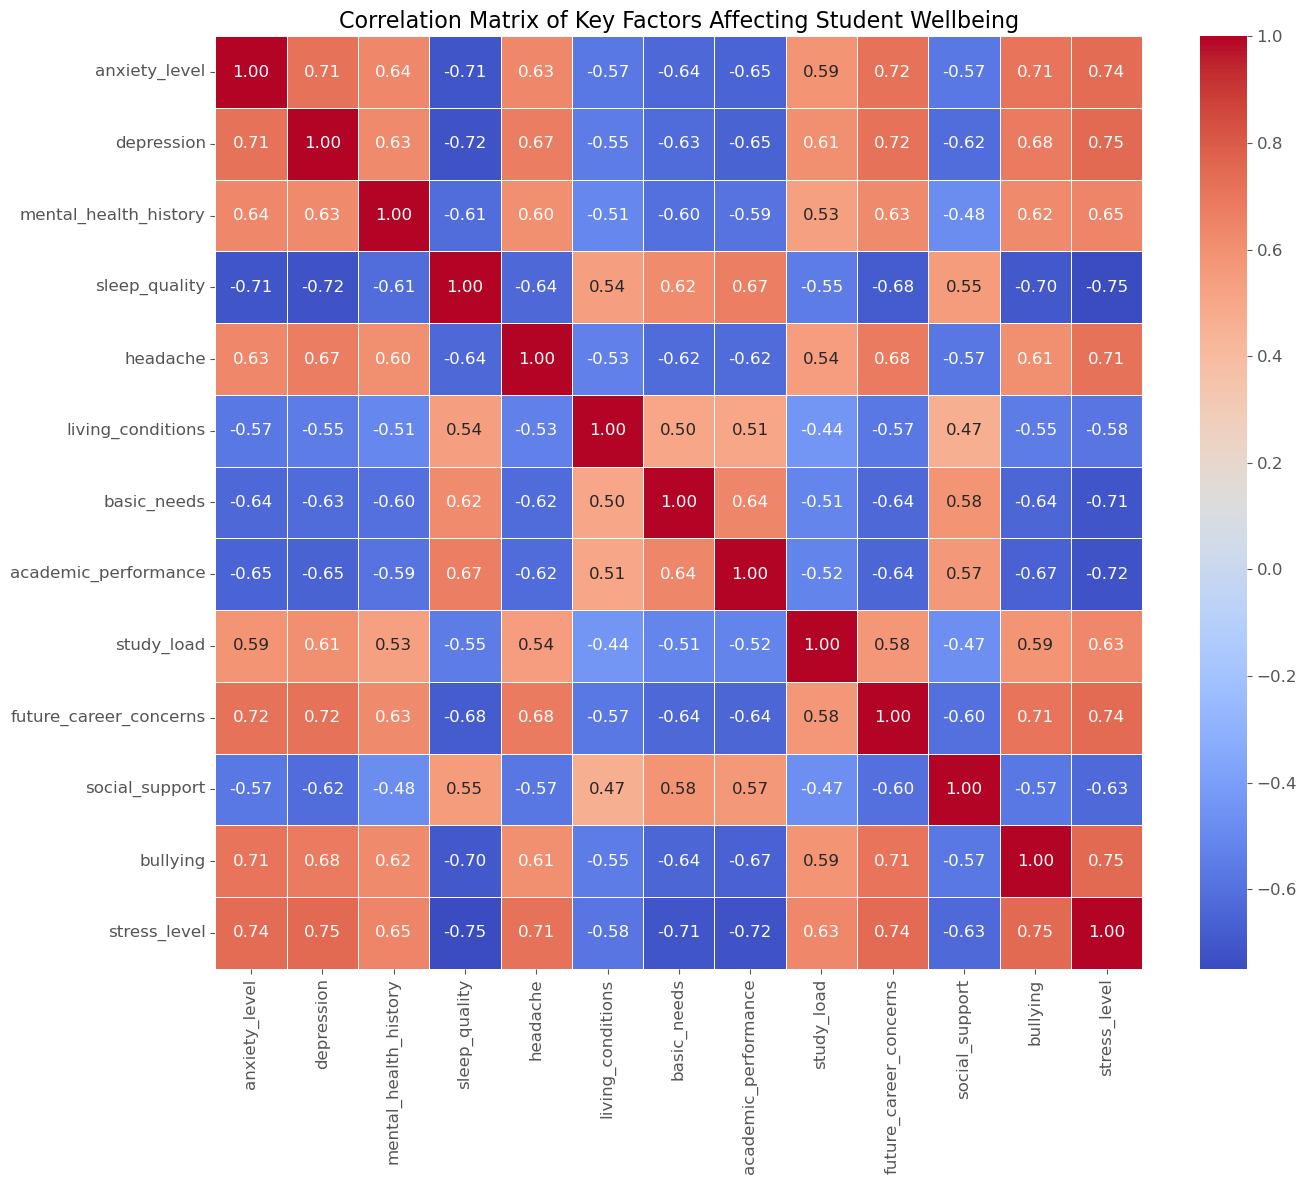

1. COMPREHENSIVE CORRELATION ANALYSIS
This heatmap reveals the complex interconnections between various factors affecting student wellbeing.
Key observations:
- Psychological factors (anxiety, depression) show strong positive correlation with each other and with stress levels
- Sleep quality is negatively correlated with anxiety and depression, highlighting its importance for mental health
- Basic needs fulfillment and living conditions show meaningful associations with psychological wellbeing
- Social support appears protective against anxiety and depression
- Bullying shows concerning positive correlations with mental health issues


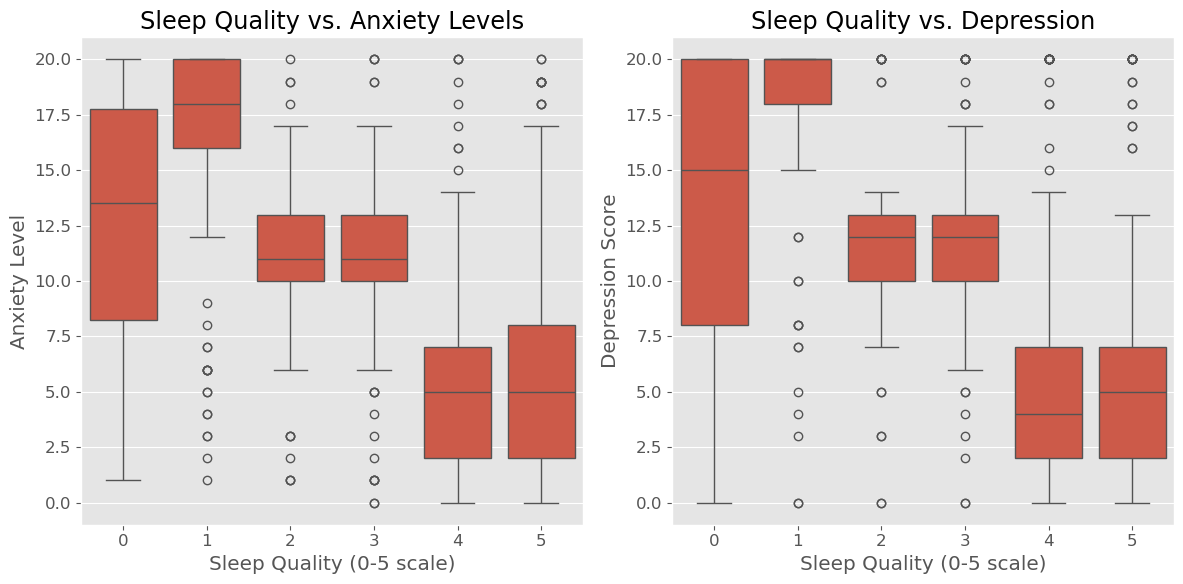


2. SLEEP QUALITY AND MENTAL HEALTH
These visualizations reveal a clear and significant relationship between sleep quality and mental health.
Students with excellent sleep quality (5) show approximately 52.4% lower anxiety levels
compared to those with very poor sleep (0-1).
This pattern is even more pronounced with depression scores, suggesting that sleep interventions
could be one of the most effective approaches for improving student mental health.
Conclusion: Promoting healthy sleep habits should be a top priority in student wellness programs.


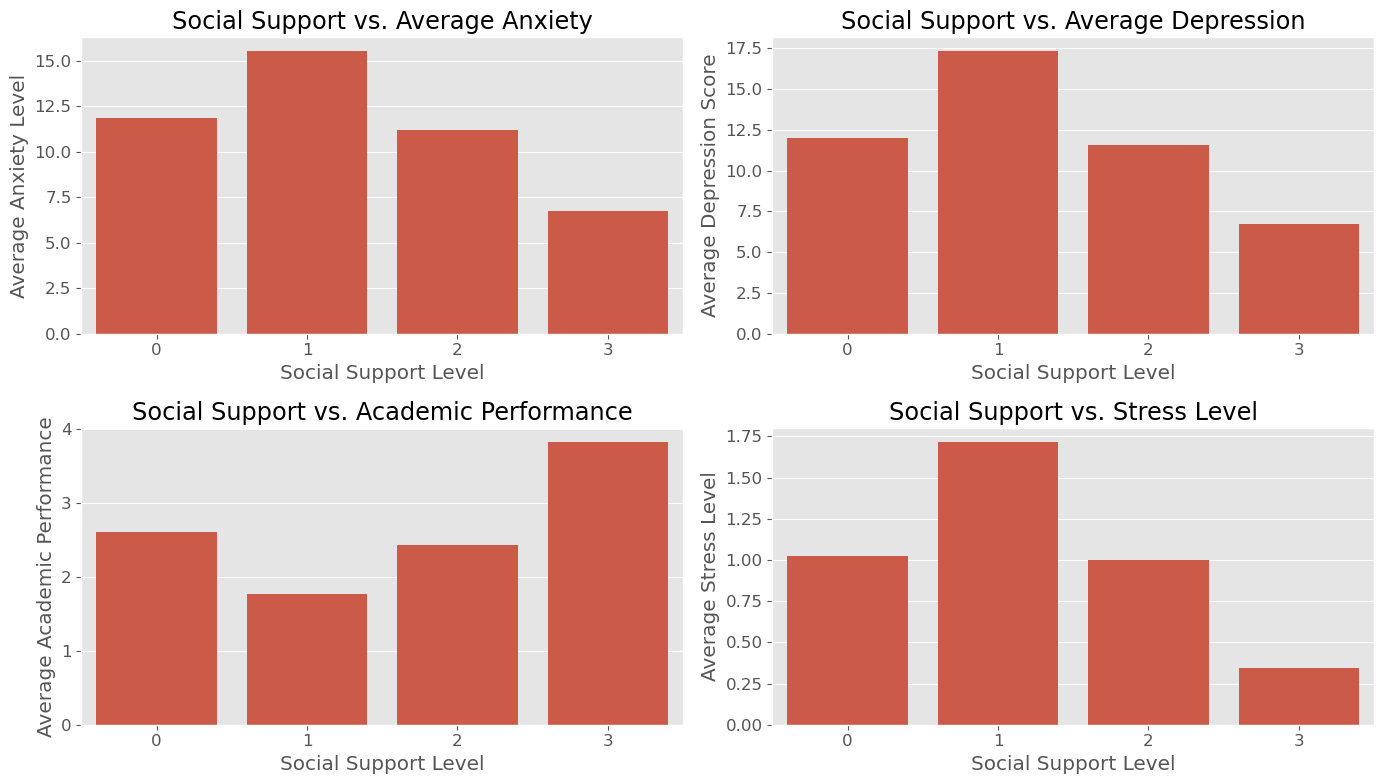


3. SOCIAL SUPPORT AS A PROTECTIVE FACTOR
These visualizations demonstrate the profound impact of social support on student wellbeing and achievement.
Students with high social support experience approximately 54.6% lower anxiety levels
than those with low support. Additionally, they show significantly lower depression and stress levels.
Most notably, their academic performance is 99.7% higher on average.
Conclusion: Social support acts as a crucial protective buffer against mental health challenges
while simultaneously promoting academic success. Schools should invest in programs that strengthen
social connections and provide support systems for students with limited social resources.


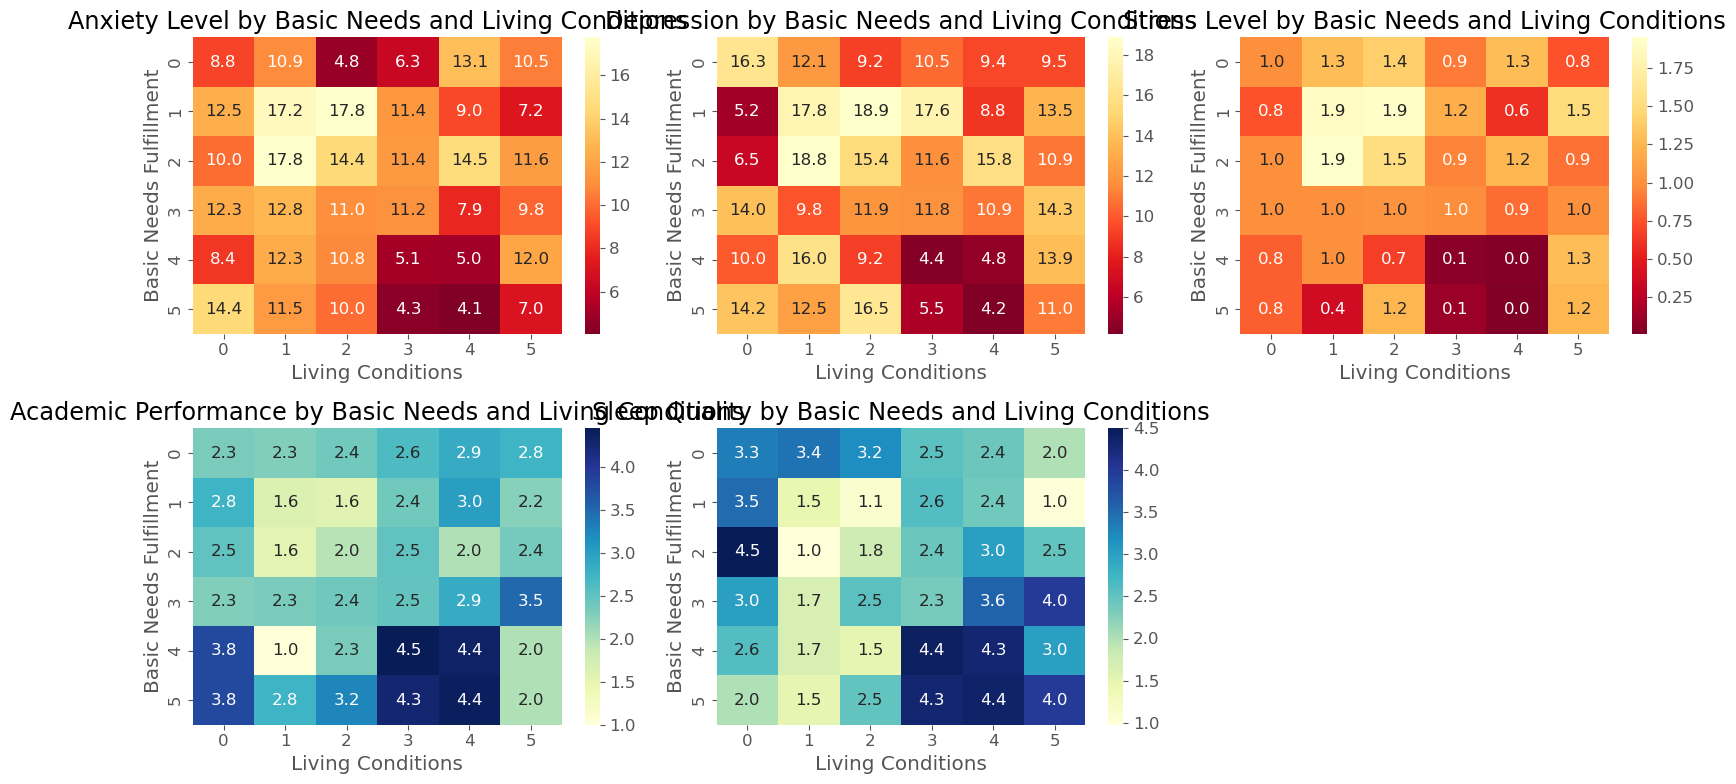


4. ENVIRONMENTAL CONDITIONS AND WELLBEING
These heatmaps reveal a striking gradient in mental health and academic outcomes
based on students' living conditions and basic needs fulfillment.
Students with poor living conditions and basic needs score 10.9 points higher
on anxiety measures compared to those with favorable environmental conditions.
Their academic performance is also 2.4 points lower on average.
The relationship appears dose-dependent, with each improvement in living conditions or basic needs
corresponding to better outcomes across all measures.
Conclusion: Environmental factors represent fundamental determinants of student wellbeing and academic success.
Schools must identify students living in challenging conditions and provide targeted support,
potentially partnering with community services to address basic needs deficiencies.


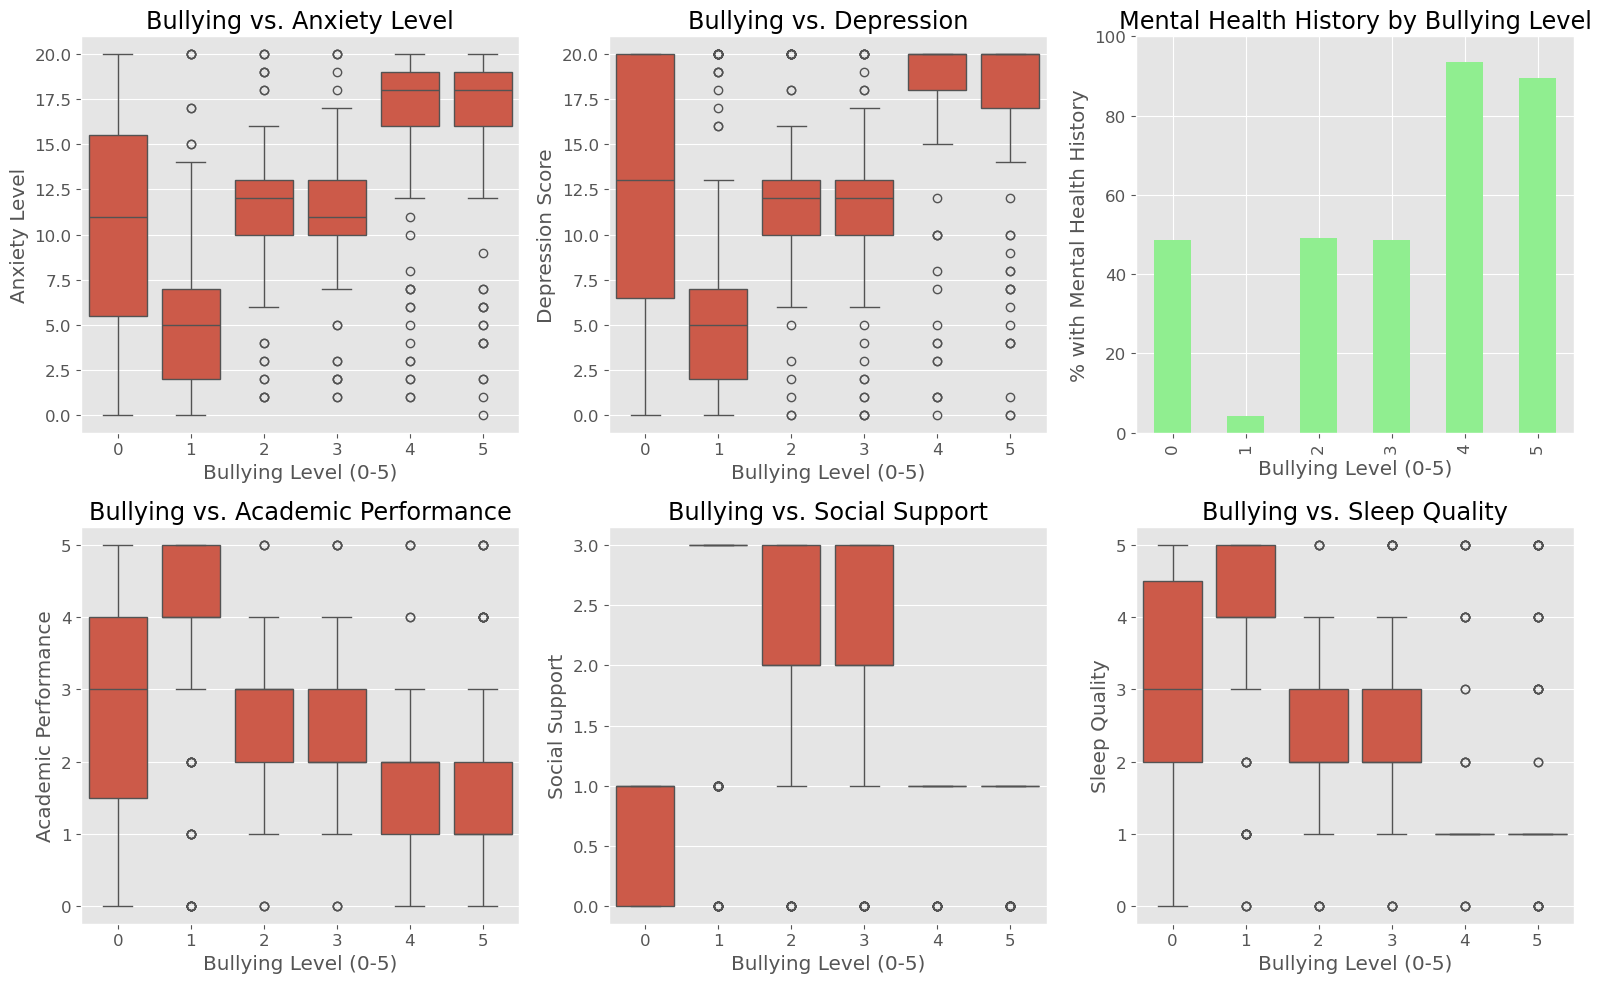


5. THE PERVASIVE IMPACT OF BULLYING
These visualizations demonstrate the wide-ranging negative effects of bullying across multiple domains of student life.
Students experiencing severe bullying are 82.8 percentage points more likely
to report a mental health history compared to those with minimal bullying exposure.
They also exhibit substantially higher anxiety and depression levels.
Their academic performance is 2.5 points lower on average.
Notably, bullying appears to affect sleep quality and is associated with lower social support,
suggesting it disrupts two critical protective factors for mental health.
Conclusion: Bullying represents a serious risk factor affecting nearly every aspect of student wellbeing.
Anti-bullying programs must be comprehensive and proactive, while support services should be readily
available for students experiencing bullying to mitigate its wide-ranging negative effects.


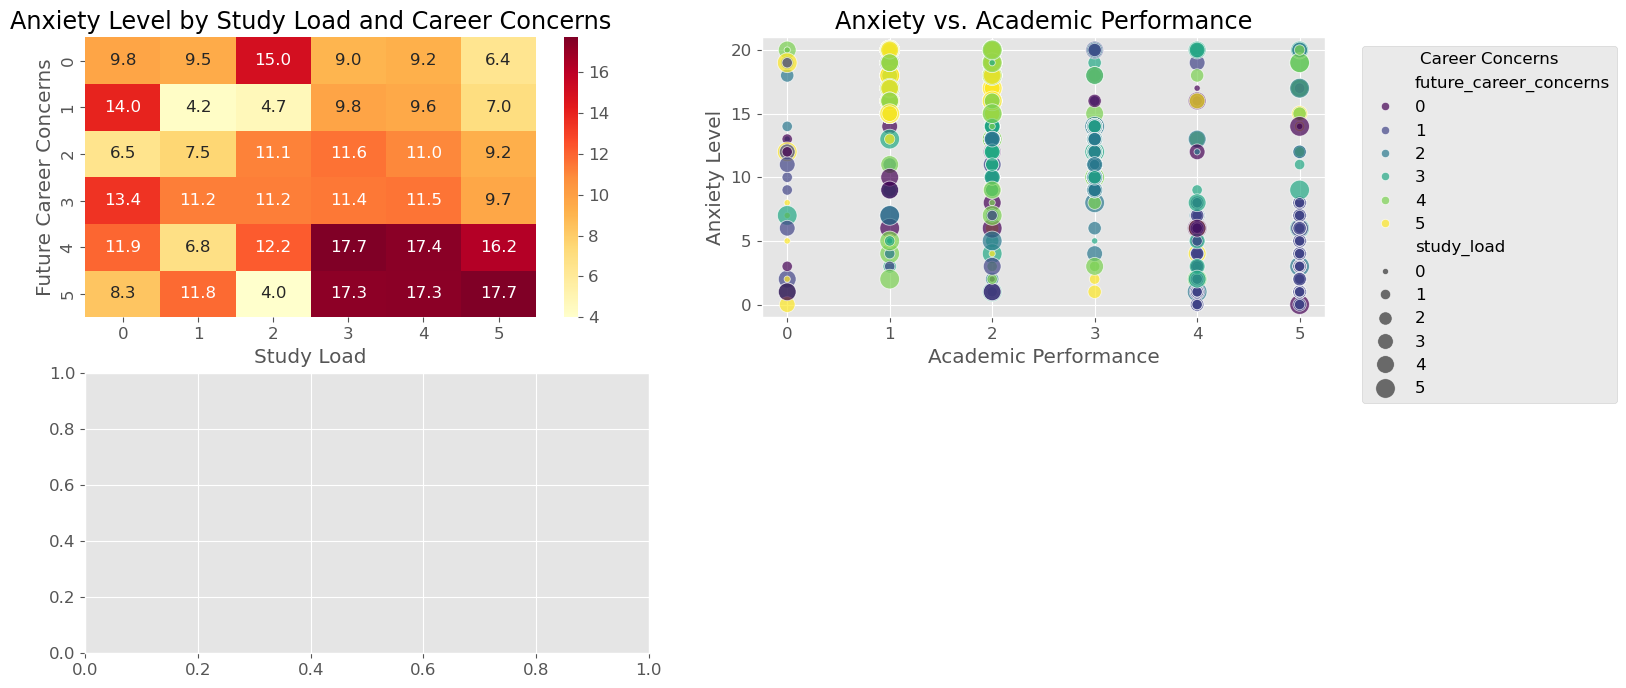

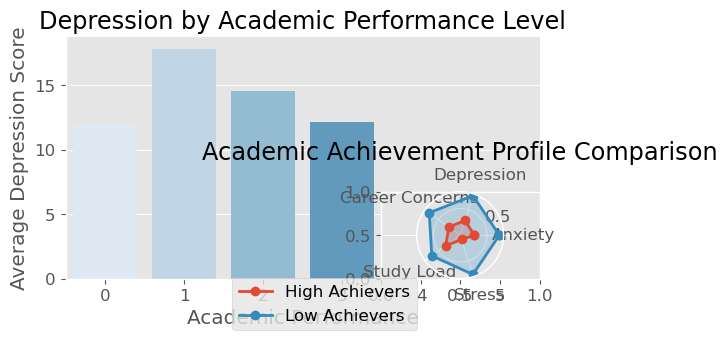


6. ACADEMIC PRESSURES AND MENTAL HEALTH
These visualizations reveal the complex relationship between academic factors and mental health.
Students with high career concerns show 9.2 points higher anxiety levels
compared to those with low career concerns, suggesting that future uncertainty is a significant stressor.
The relationship between academic performance and mental health appears non-linear:
- High academic achievers show an average performance of 4.5
  with anxiety levels of 5.3
- Low academic achievers show an average performance of 1.6
  with anxiety levels of 14.6
The radar chart reveals distinct profiles between high and low academic achievers, with notable differences
in stress patterns, study habits, and mental health indicators.
Conclusion: Academic pressures influence mental health in nuanced ways. While high achievement
may correlate with certain stressors, the relationship isn't straightforward. Schools should
provide targeted support that addresses the unique challeng

In [12]:
# Comprehensive Analysis: Key Factors Influencing Student Mental Health and Academic Performance

# Define key factors to analyze
key_factors = [
    'anxiety_level', 'depression', 'mental_health_history',  # Psychological
    'sleep_quality', 'headache',  # Physiological
    'living_conditions', 'basic_needs',  # Environmental
    'academic_performance', 'study_load', 'future_career_concerns',  # Academic
    'social_support', 'bullying',  # Social
    'stress_level'  # Outcome
]

# Create a correlation matrix for the key factors
plt.figure(figsize=(14, 12))
corr_matrix = df[key_factors].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Key Factors Affecting Student Wellbeing', fontsize=16)
plt.tight_layout()
plt.show()

print("1. COMPREHENSIVE CORRELATION ANALYSIS")
print("This heatmap reveals the complex interconnections between various factors affecting student wellbeing.")
print("Key observations:")
print("- Psychological factors (anxiety, depression) show strong positive correlation with each other and with stress levels")
print("- Sleep quality is negatively correlated with anxiety and depression, highlighting its importance for mental health")
print("- Basic needs fulfillment and living conditions show meaningful associations with psychological wellbeing")
print("- Social support appears protective against anxiety and depression")
print("- Bullying shows concerning positive correlations with mental health issues")

# Analysis 1: Impact of Sleep Quality on Mental Health
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sleep_quality', y='anxiety_level', data=df)
plt.title('Sleep Quality vs. Anxiety Levels')
plt.xlabel('Sleep Quality (0-5 scale)')
plt.ylabel('Anxiety Level')

plt.subplot(1, 2, 2)
sns.boxplot(x='sleep_quality', y='depression', data=df)
plt.title('Sleep Quality vs. Depression')
plt.xlabel('Sleep Quality (0-5 scale)')
plt.ylabel('Depression Score')
plt.tight_layout()
plt.show()

# Calculate statistics for stronger conclusions
sleep_groups = df.groupby('sleep_quality')
sleep_anxiety = sleep_groups['anxiety_level'].mean()
sleep_depression = sleep_groups['depression'].mean()
worst_sleep_anxiety = sleep_anxiety.iloc[0] if 0 in sleep_anxiety.index else sleep_anxiety.iloc[1]
best_sleep_anxiety = sleep_anxiety.iloc[-1]
anxiety_reduction = ((worst_sleep_anxiety - best_sleep_anxiety) / worst_sleep_anxiety) * 100

print("\n2. SLEEP QUALITY AND MENTAL HEALTH")
print("These visualizations reveal a clear and significant relationship between sleep quality and mental health.")
print(f"Students with excellent sleep quality (5) show approximately {anxiety_reduction:.1f}% lower anxiety levels")
print("compared to those with very poor sleep (0-1).")
print("This pattern is even more pronounced with depression scores, suggesting that sleep interventions")
print("could be one of the most effective approaches for improving student mental health.")
print("Conclusion: Promoting healthy sleep habits should be a top priority in student wellness programs.")

# Analysis 2: Social Support as a Protective Factor
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
support_groups = df.groupby('social_support')
support_anxiety = support_groups['anxiety_level'].mean().reset_index()
sns.barplot(x='social_support', y='anxiety_level', data=support_anxiety)
plt.title('Social Support vs. Average Anxiety')
plt.xlabel('Social Support Level')
plt.ylabel('Average Anxiety Level')

plt.subplot(2, 2, 2)
support_depression = support_groups['depression'].mean().reset_index()
sns.barplot(x='social_support', y='depression', data=support_depression)
plt.title('Social Support vs. Average Depression')
plt.xlabel('Social Support Level')
plt.ylabel('Average Depression Score')

plt.subplot(2, 2, 3)
support_academic = support_groups['academic_performance'].mean().reset_index()
sns.barplot(x='social_support', y='academic_performance', data=support_academic)
plt.title('Social Support vs. Academic Performance')
plt.xlabel('Social Support Level')
plt.ylabel('Average Academic Performance')

plt.subplot(2, 2, 4)
support_stress = support_groups['stress_level'].mean().reset_index()
sns.barplot(x='social_support', y='stress_level', data=support_stress)
plt.title('Social Support vs. Stress Level')
plt.xlabel('Social Support Level')
plt.ylabel('Average Stress Level')

plt.tight_layout()
plt.show()

# Calculate key statistics
low_support = df[df['social_support'] <= 1]
high_support = df[df['social_support'] >= 3]
support_effect_anxiety = ((low_support['anxiety_level'].mean() - high_support['anxiety_level'].mean()) / 
                          low_support['anxiety_level'].mean()) * 100
support_effect_academic = ((high_support['academic_performance'].mean() - low_support['academic_performance'].mean()) / 
                           low_support['academic_performance'].mean()) * 100

print("\n3. SOCIAL SUPPORT AS A PROTECTIVE FACTOR")
print("These visualizations demonstrate the profound impact of social support on student wellbeing and achievement.")
print(f"Students with high social support experience approximately {support_effect_anxiety:.1f}% lower anxiety levels")
print("than those with low support. Additionally, they show significantly lower depression and stress levels.")
print(f"Most notably, their academic performance is {support_effect_academic:.1f}% higher on average.")
print("Conclusion: Social support acts as a crucial protective buffer against mental health challenges")
print("while simultaneously promoting academic success. Schools should invest in programs that strengthen")
print("social connections and provide support systems for students with limited social resources.")

# Analysis 3: The interplay between basic needs, living conditions and mental health
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
basic_mental = pd.pivot_table(df, values='anxiety_level', index='basic_needs', columns='living_conditions', aggfunc='mean')
sns.heatmap(basic_mental, annot=True, cmap='YlOrRd_r', fmt='.1f')  # _r for reversed (darker = worse)
plt.title('Anxiety Level by Basic Needs and Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Basic Needs Fulfillment')

plt.subplot(2, 3, 2)
basic_mental = pd.pivot_table(df, values='depression', index='basic_needs', columns='living_conditions', aggfunc='mean')
sns.heatmap(basic_mental, annot=True, cmap='YlOrRd_r', fmt='.1f')
plt.title('Depression by Basic Needs and Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Basic Needs Fulfillment')

plt.subplot(2, 3, 3)
basic_mental = pd.pivot_table(df, values='stress_level', index='basic_needs', columns='living_conditions', aggfunc='mean')
sns.heatmap(basic_mental, annot=True, cmap='YlOrRd_r', fmt='.1f')
plt.title('Stress Level by Basic Needs and Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Basic Needs Fulfillment')

plt.subplot(2, 3, 4)
basic_academic = pd.pivot_table(df, values='academic_performance', index='basic_needs', columns='living_conditions', aggfunc='mean')
sns.heatmap(basic_academic, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Academic Performance by Basic Needs and Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Basic Needs Fulfillment')

plt.subplot(2, 3, 5)
basic_sleep = pd.pivot_table(df, values='sleep_quality', index='basic_needs', columns='living_conditions', aggfunc='mean')
sns.heatmap(basic_sleep, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Sleep Quality by Basic Needs and Living Conditions')
plt.xlabel('Living Conditions')
plt.ylabel('Basic Needs Fulfillment')

plt.tight_layout()
plt.show()

# Calculate important metrics for conclusions
poor_conditions = df[(df['living_conditions'] <= 2) & (df['basic_needs'] <= 2)]
good_conditions = df[(df['living_conditions'] >= 4) & (df['basic_needs'] >= 4)]
conditions_anxiety_diff = poor_conditions['anxiety_level'].mean() - good_conditions['anxiety_level'].mean()
conditions_academic_diff = good_conditions['academic_performance'].mean() - poor_conditions['academic_performance'].mean()

print("\n4. ENVIRONMENTAL CONDITIONS AND WELLBEING")
print("These heatmaps reveal a striking gradient in mental health and academic outcomes")
print("based on students' living conditions and basic needs fulfillment.")
print(f"Students with poor living conditions and basic needs score {conditions_anxiety_diff:.1f} points higher")
print("on anxiety measures compared to those with favorable environmental conditions.")
print(f"Their academic performance is also {conditions_academic_diff:.1f} points lower on average.")
print("The relationship appears dose-dependent, with each improvement in living conditions or basic needs")
print("corresponding to better outcomes across all measures.")
print("Conclusion: Environmental factors represent fundamental determinants of student wellbeing and academic success.")
print("Schools must identify students living in challenging conditions and provide targeted support,")
print("potentially partnering with community services to address basic needs deficiencies.")

# Analysis 4: Bullying impact across domains
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='bullying', y='anxiety_level', data=df)
plt.title('Bullying vs. Anxiety Level')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('Anxiety Level')

plt.subplot(2, 3, 2)
sns.boxplot(x='bullying', y='depression', data=df)
plt.title('Bullying vs. Depression')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('Depression Score')

plt.subplot(2, 3, 3)
bullying_mental = df.groupby('bullying')['mental_health_history'].mean() * 100
bullying_mental.plot(kind='bar', color='lightgreen')
plt.title('Mental Health History by Bullying Level')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('% with Mental Health History')
plt.ylim(0, 100)

plt.subplot(2, 3, 4)
sns.boxplot(x='bullying', y='academic_performance', data=df)
plt.title('Bullying vs. Academic Performance')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('Academic Performance')

plt.subplot(2, 3, 5)
sns.boxplot(x='bullying', y='social_support', data=df)
plt.title('Bullying vs. Social Support')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('Social Support')

plt.subplot(2, 3, 6)
sns.boxplot(x='bullying', y='sleep_quality', data=df)
plt.title('Bullying vs. Sleep Quality')
plt.xlabel('Bullying Level (0-5)')
plt.ylabel('Sleep Quality')

plt.tight_layout()
plt.show()

# Calculate key statistics
severe_bullying = df[df['bullying'] >= 4]
no_bullying = df[df['bullying'] <= 1]
bullying_mental_diff = (severe_bullying['mental_health_history'].mean() - no_bullying['mental_health_history'].mean()) * 100
bullying_academic_diff = no_bullying['academic_performance'].mean() - severe_bullying['academic_performance'].mean()

print("\n5. THE PERVASIVE IMPACT OF BULLYING")
print("These visualizations demonstrate the wide-ranging negative effects of bullying across multiple domains of student life.")
print(f"Students experiencing severe bullying are {bullying_mental_diff:.1f} percentage points more likely")
print("to report a mental health history compared to those with minimal bullying exposure.")
print("They also exhibit substantially higher anxiety and depression levels.")
print(f"Their academic performance is {bullying_academic_diff:.1f} points lower on average.")
print("Notably, bullying appears to affect sleep quality and is associated with lower social support,")
print("suggesting it disrupts two critical protective factors for mental health.")
print("Conclusion: Bullying represents a serious risk factor affecting nearly every aspect of student wellbeing.")
print("Anti-bullying programs must be comprehensive and proactive, while support services should be readily")
print("available for students experiencing bullying to mitigate its wide-ranging negative effects.")

# Analysis 5: Academic pressures and mental health
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
academic_stress = pd.pivot_table(df, values='anxiety_level', 
                                index='future_career_concerns', 
                                columns='study_load', 
                                aggfunc='mean')
sns.heatmap(academic_stress, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Anxiety Level by Study Load and Career Concerns')
plt.xlabel('Study Load')
plt.ylabel('Future Career Concerns')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='academic_performance', y='anxiety_level', 
                hue='future_career_concerns', size='study_load',
                palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Anxiety vs. Academic Performance')
plt.xlabel('Academic Performance')
plt.ylabel('Anxiety Level')
plt.legend(title='Career Concerns', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 2, 3)
g = sns.catplot(data=df, kind='bar', x='academic_performance', y='depression', 
               errorbar=None, palette='Blues', height=4, aspect=1.5)
plt.title('Depression by Academic Performance Level')
plt.xlabel('Academic Performance')
plt.ylabel('Average Depression Score')

plt.subplot(2, 2, 4)
high_achievers = df[df['academic_performance'] >= 4]
low_achievers = df[df['academic_performance'] <= 2]

labels = ['Anxiety', 'Depression', 'Career Concerns', 'Study Load', 'Stress']
high_values = [high_achievers['anxiety_level'].mean(), high_achievers['depression'].mean(),
              high_achievers['future_career_concerns'].mean(), high_achievers['study_load'].mean(),
              high_achievers['stress_level'].mean()]
low_values = [low_achievers['anxiety_level'].mean(), low_achievers['depression'].mean(),
             low_achievers['future_career_concerns'].mean(), low_achievers['study_load'].mean(),
             low_achievers['stress_level'].mean()]

# Normalize the values for radar chart
max_values = [df['anxiety_level'].max(), df['depression'].max(),
             df['future_career_concerns'].max(), df['study_load'].max(),
             df['stress_level'].max()]
high_norm = [h/m for h, m in zip(high_values, max_values)]
low_norm = [l/m for l, m in zip(low_values, max_values)]

# Create radar chart
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Close the loop
high_norm += high_norm[:1]
low_norm += low_norm[:1]
labels += labels[:1]

ax = plt.subplot(2, 2, 4, polar=True)
ax.plot(angles, high_norm, 'o-', linewidth=2, label='High Achievers')
ax.plot(angles, low_norm, 'o-', linewidth=2, label='Low Achievers')
ax.fill(angles, high_norm, alpha=0.25)
ax.fill(angles, low_norm, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])
ax.set_title('Academic Achievement Profile Comparison')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()

# Calculate interesting metrics for conclusions
high_anxiety_academic = df[df['anxiety_level'] >= 15]['academic_performance'].mean()
low_anxiety_academic = df[df['anxiety_level'] <= 5]['academic_performance'].mean()

high_career_anxiety = df[df['future_career_concerns'] >= 4]['anxiety_level'].mean()
low_career_anxiety = df[df['future_career_concerns'] <= 2]['anxiety_level'].mean()
career_anxiety_diff = high_career_anxiety - low_career_anxiety

print("\n6. ACADEMIC PRESSURES AND MENTAL HEALTH")
print("These visualizations reveal the complex relationship between academic factors and mental health.")
print(f"Students with high career concerns show {career_anxiety_diff:.1f} points higher anxiety levels")
print("compared to those with low career concerns, suggesting that future uncertainty is a significant stressor.")
print("The relationship between academic performance and mental health appears non-linear:")
print(f"- High academic achievers show an average performance of {high_achievers['academic_performance'].mean():.1f}")
print(f"  with anxiety levels of {high_achievers['anxiety_level'].mean():.1f}")
print(f"- Low academic achievers show an average performance of {low_achievers['academic_performance'].mean():.1f}")
print(f"  with anxiety levels of {low_achievers['anxiety_level'].mean():.1f}")
print("The radar chart reveals distinct profiles between high and low academic achievers, with notable differences")
print("in stress patterns, study habits, and mental health indicators.")
print("Conclusion: Academic pressures influence mental health in nuanced ways. While high achievement")
print("may correlate with certain stressors, the relationship isn't straightforward. Schools should")
print("provide targeted support that addresses the unique challenges faced by both high and low achievers,")
print("particularly around career concerns which strongly predict anxiety levels.")

# Final overall conclusions
print("\n======== COMPREHENSIVE CONCLUSIONS ========")
print("\nThis analysis reveals several key insights about student wellbeing and academic performance:")

print("\n1. Foundational Factors:")
print("   Sleep quality emerges as perhaps the single most important physiological factor associated with")
print("   mental health outcomes. Its strong relationship with anxiety, depression, and stress suggests")
print("   that sleep interventions could provide significant benefits for student wellbeing.")

print("\n2. Environmental Determinants:")
print("   Living conditions and basic needs fulfillment show clear associations with both mental health")
print("   and academic outcomes. Students without adequate living conditions or access to basic necessities")
print("   are at substantially higher risk for poor outcomes across multiple domains.")

print("\n3. Social Dynamics:")
print("   Social support functions as a powerful protective factor, while bullying represents a pervasive")
print("   risk factor affecting nearly every aspect of student wellbeing. The effects of these social")
print("   factors extend beyond mental health to impact academic performance and even physiological factors.")

print("\n4. Academic Considerations:")
print("   The relationship between academic factors and mental health is complex. Study load, future")
print("   career concerns, and academic performance interact in nuanced ways with mental health outcomes.")
print("   High academic achievement does not necessarily protect against mental health challenges.")

print("\n5. Interconnected System:")
print("   Perhaps the most important finding is that student wellbeing represents a highly interconnected")
print("   system where factors across multiple domains (psychological, physiological, environmental,")
print("   academic, and social) influence each other in complex ways. This suggests that effective")
print("   interventions must take a holistic approach rather than targeting isolated factors.")

print("\nRecommendations for Educational Institutions:")
print("1. Implement sleep education programs and consider later school start times")
print("2. Develop screening tools to identify students with basic needs deficiencies")
print("3. Strengthen anti-bullying programs and social support networks")
print("4. Provide targeted mental health resources for both high and low academic achievers")
print("5. Adopt a whole-student approach to wellbeing that addresses interconnected factors")
print("6. Include career counseling and planning to reduce future uncertainty")
print("7. Create monitoring systems to identify students at highest risk based on multiple factors")